In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
import numpy as np, scipy.stats as st
import statistics
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as sk
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Reading the Data

In [155]:
# binancecoin
binance_coin=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/binancecoin.csv')
display(binance_coin)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-13,1.042900,1.042900,0.880241,0.937204,0.937204,2.780700e+06
1,2017-09-14,0.937870,0.950177,0.673482,0.678784,0.678784,3.134360e+06
2,2017-09-15,0.683305,0.849217,0.526755,0.799709,0.799709,4.625680e+06
3,2017-09-16,0.808056,0.927197,0.746113,0.804198,0.804198,2.829570e+06
4,2017-09-17,0.803423,0.814797,0.733745,0.789589,0.789589,1.273640e+06
...,...,...,...,...,...,...,...
1457,2021-09-09,405.580597,435.717407,404.521149,421.270020,421.270020,2.392140e+09
1458,2021-09-10,421.268890,438.922180,394.062836,401.621796,401.621796,2.306736e+09
1459,2021-09-11,401.263489,415.357025,400.299255,405.527374,405.527374,1.567256e+09
1460,2021-09-12,405.399170,421.207581,398.032135,416.683228,416.683228,1.671909e+09


In [156]:
#Bitcoin
bitcoin=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bitcoin.csv')
display(bitcoin)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,1.847880e+07
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,2.099780e+07
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,1.917780e+07
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,2.014420e+07
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,1.893540e+07
...,...,...,...,...,...,...,...
2188,2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,3.867266e+10
2189,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,3.915467e+10
2190,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,3.449984e+10
2191,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,2.788198e+10


In [157]:
#Cardano
cardano=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/cardano.csv')
display(cardano)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,5.006870e+07
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,5.764130e+07
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,1.699780e+07
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9.000050e+06
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5.562510e+06
...,...,...,...,...,...,...,...
1439,2021-09-09,2.406712,2.621054,2.387085,2.517666,2.517666,6.031548e+09
1440,2021-09-10,2.517666,2.585671,2.302802,2.385911,2.385911,6.130461e+09
1441,2021-09-11,2.385186,2.796062,2.375493,2.633950,2.633950,8.670620e+09
1442,2021-09-12,2.641341,2.783103,2.511185,2.581727,2.581727,8.111331e+09


In [158]:
# dogecoin
dogecoin=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/dogecoin.csv')
display(dogecoin)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,0.000127,0.000129,0.000123,0.000126,0.000126,4.088900e+04
1,2015-09-14,0.000125,0.000126,0.000122,0.000125,0.000125,6.118900e+04
2,2015-09-15,0.000125,0.000131,0.000123,0.000126,0.000126,4.333200e+04
3,2015-09-16,0.000126,0.000126,0.000122,0.000124,0.000124,6.032300e+04
4,2015-09-17,0.000124,0.000126,0.000122,0.000125,0.000125,6.051200e+04
...,...,...,...,...,...,...,...
2188,2021-09-09,0.250362,0.259558,0.249270,0.252596,0.252596,1.763184e+09
2189,2021-09-10,0.252585,0.261622,0.235909,0.239982,0.239982,1.840816e+09
2190,2021-09-11,0.239826,0.248018,0.238487,0.241432,0.241432,1.196338e+09
2191,2021-09-12,0.241329,0.254794,0.239233,0.250617,0.250617,1.419289e+09


In [159]:
# Ethereum
ethereum=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ethereum.csv')
display(ethereum)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,6.441380e+05
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,7.410850e+05
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,7.033900e+05
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,6.155930e+05
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,8.979400e+05
...,...,...,...,...,...,...,...
2188,2021-09-09,3452.548340,3562.992676,3400.517090,3427.340088,3427.340088,2.411806e+10
2189,2021-09-10,3425.564941,3512.571289,3157.059082,3211.505859,3211.505859,2.235597e+10
2190,2021-09-11,3209.030518,3346.526367,3208.961914,3270.278076,3270.278076,1.862712e+10
2191,2021-09-12,3270.291748,3462.468262,3235.109375,3410.134521,3410.134521,1.681041e+10


In [160]:
# HEX
hex=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hex.csv')
display(hex)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-22,0.004035,0.004105,0.003688,0.003790,0.003790,1486491.0
1,2020-09-23,0.003789,0.003798,0.003345,0.003443,0.003443,1522601.0
2,2020-09-24,0.003443,0.003630,0.003429,0.003618,0.003618,1316401.0
3,2020-09-25,0.003622,0.003774,0.003568,0.003753,0.003753,1174258.0
4,2020-09-26,0.003754,0.004019,0.003542,0.004019,0.004019,1181630.0
...,...,...,...,...,...,...,...
352,2021-09-09,0.453253,0.477114,0.415717,0.466912,0.466912,116064573.0
353,2021-09-10,0.466927,0.489330,0.435714,0.462361,0.462361,114748297.0
354,2021-09-11,0.462436,0.463928,0.400995,0.451062,0.451062,100561776.0
355,2021-09-12,0.451103,0.451215,0.363776,0.409270,0.409270,86807293.0


In [161]:
# Polkadot
polkadot=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/polkadot.csv')
display(polkadot)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-22,4.085402,4.208596,3.918225,4.174463,4.174463,6.731173e+08
1,2020-09-23,4.172700,4.318420,3.977660,4.027708,4.027708,5.064917e+08
2,2020-09-24,4.018092,4.410974,3.995835,4.382961,4.382961,3.902547e+08
3,2020-09-25,4.383141,4.528383,4.268145,4.423528,4.423528,3.866558e+08
4,2020-09-26,4.423381,4.474607,4.249232,4.334268,4.334268,3.062783e+08
...,...,...,...,...,...,...,...
352,2021-09-09,27.206137,31.800285,27.075872,29.835569,29.835569,3.007862e+09
353,2021-09-10,29.817101,32.568165,28.109940,29.215357,29.215357,3.735477e+09
354,2021-09-11,29.178246,32.052071,28.332056,31.594603,31.594603,2.273036e+09
355,2021-09-12,31.631861,36.302341,30.696190,35.774338,35.774338,4.160379e+09


In [162]:
# Solana
solana=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/solana.csv')
display(solana)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-22,2.773688,2.994370,2.668603,2.915519,2.915519,1.855652e+07
1,2020-09-23,2.915482,3.068649,2.728075,2.846996,2.846996,1.441629e+07
2,2020-09-24,2.846996,3.253473,2.797281,3.151377,3.151377,1.698903e+07
3,2020-09-25,3.159573,3.271722,2.913430,3.191359,3.191359,1.396112e+07
4,2020-09-26,3.193931,3.230423,3.039811,3.139166,3.139166,8.877567e+06
...,...,...,...,...,...,...,...
352,2021-09-09,209.470795,214.957184,181.445877,188.195801,188.195801,1.267627e+10
353,2021-09-10,187.612808,196.945190,168.690826,179.865234,179.865234,7.087525e+09
354,2021-09-11,179.366226,193.405609,175.565414,178.867874,178.867874,5.367389e+09
355,2021-09-12,179.230164,181.568253,170.584595,174.537628,174.537628,3.012633e+09


In [163]:
# Tether
tether=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/tether.csv')
display(tether)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,1.000000,1.000000,1.000000,1.000000,1.000000,6.960000e+02
1,2015-09-14,1.000000,1.000000,1.000000,1.000000,1.000000,2.280000e+02
2,2015-09-15,1.000000,1.000000,1.000000,1.000000,1.000000,7.198200e+04
3,2015-09-16,1.000000,1.000000,1.000000,1.000000,1.000000,5.282100e+04
4,2015-09-17,1.000000,1.000000,1.000000,1.000000,1.000000,2.826800e+04
...,...,...,...,...,...,...,...
2188,2021-09-09,1.000329,1.000878,1.000023,1.000146,1.000146,9.982837e+10
2189,2021-09-10,1.000172,1.000704,0.999881,1.000320,1.000320,9.697781e+10
2190,2021-09-11,1.000298,1.001119,0.999655,1.000979,1.000979,7.783782e+10
2191,2021-09-12,1.001041,1.001154,0.999271,0.999698,0.999698,7.308023e+10


In [164]:
# USD coin
usd_coin=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/usdcoin.csv')
display(usd_coin)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-13,0.999028,1.006490,0.997497,0.998835,0.998835,1.596073e+08
1,2019-09-14,0.999584,1.004739,0.998116,0.999346,0.999346,1.465911e+08
2,2019-09-15,0.999346,1.006140,0.998562,1.003387,1.003387,1.084790e+08
3,2019-09-16,1.003133,1.010504,0.995350,0.999926,0.999926,3.036815e+08
4,2019-09-17,1.000015,1.006766,0.998124,1.003121,1.003121,1.714235e+08
...,...,...,...,...,...,...,...
727,2021-09-09,1.000371,1.000667,0.987380,1.000210,1.000210,3.450210e+09
728,2021-09-10,1.000040,1.000677,0.999764,1.000231,1.000231,3.691327e+09
729,2021-09-11,1.000171,1.000971,0.999649,1.000971,1.000971,2.652391e+09
730,2021-09-12,1.000966,1.001009,0.999319,0.999490,0.999490,2.394483e+09


In [165]:
# XRP
xrp=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/xrp.csv')
display(xrp)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,0.008197,0.008538,0.008150,0.008532,0.008532,6.287500e+04
1,2015-09-14,0.008535,0.008645,0.007404,0.007404,0.007404,2.748350e+05
2,2015-09-15,0.007398,0.007892,0.007344,0.007720,0.007720,6.765010e+05
3,2015-09-16,0.007721,0.007752,0.007406,0.007426,0.007426,3.164970e+05
4,2015-09-17,0.007427,0.007438,0.007363,0.007372,0.007372,5.441000e+05
...,...,...,...,...,...,...,...
2188,2021-09-09,1.090282,1.136105,0.838255,1.089401,1.089401,5.171653e+09
2189,2021-09-10,1.087574,1.241719,1.034317,1.057267,1.057267,7.726258e+09
2190,2021-09-11,1.056597,1.111301,1.053306,1.079906,1.079906,3.986494e+09
2191,2021-09-12,1.080278,1.127245,1.059868,1.119636,1.119636,3.403287e+09


# Checking for Missing Values

In [166]:
# Binance coin
for col in binance_coin.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(binance_coin[col])
    print("Datatype of {} is: ".format(col), binance_coin[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(binance_coin[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), binance_coin[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  1462
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  1462
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  1458
Number of missing entries for Open are:  4
Number of non-missing entries for Open are:  1458
---------------
Datatype of High is:  float64
Number of unique values for High are:  1457
Number of missing entries for High are:  4
Number of non-missing entries for High are:  1458
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  1459
Number of missing entries for Low are:  4
Number of non-missing entries for Low are:  1458
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  1459
Number of missing entries for Close are:  4
Number of non-missing entries for Close are:  1458
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  1459
Nu

In [167]:
# Bitcoin
for col in bitcoin.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(bitcoin[col])
    print("Datatype of {} is: ".format(col), bitcoin[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(bitcoin[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), bitcoin[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  2193
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  2193
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  2189
Number of missing entries for Open are:  4
Number of non-missing entries for Open are:  2189
---------------
Datatype of High is:  float64
Number of unique values for High are:  2189
Number of missing entries for High are:  4
Number of non-missing entries for High are:  2189
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  2189
Number of missing entries for Low are:  4
Number of non-missing entries for Low are:  2189
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  2188
Number of missing entries for Close are:  4
Number of non-missing entries for Close are:  2189
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  2188
Nu

In [168]:
# Cardano
for col in cardano.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(cardano[col])
    print("Datatype of {} is: ".format(col), cardano[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(cardano[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), cardano[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  1444
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  1444
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  1438
Number of missing entries for Open are:  4
Number of non-missing entries for Open are:  1440
---------------
Datatype of High is:  float64
Number of unique values for High are:  1435
Number of missing entries for High are:  4
Number of non-missing entries for High are:  1440
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  1433
Number of missing entries for Low are:  4
Number of non-missing entries for Low are:  1440
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  1437
Number of missing entries for Close are:  4
Number of non-missing entries for Close are:  1440
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  1437
Nu

In [169]:
# Dogecoin
for col in dogecoin.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(dogecoin[col])
    print("Datatype of {} is: ".format(col), dogecoin[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(dogecoin[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), dogecoin[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  2193
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  2193
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  1517
Number of missing entries for Open are:  4
Number of non-missing entries for Open are:  2189
---------------
Datatype of High is:  float64
Number of unique values for High are:  1531
Number of missing entries for High are:  4
Number of non-missing entries for High are:  2189
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  1491
Number of missing entries for Low are:  4
Number of non-missing entries for Low are:  2189
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  1513
Number of missing entries for Close are:  4
Number of non-missing entries for Close are:  2189
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  1513
Nu

In [170]:
# Ethereum
for col in ethereum.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(ethereum[col])
    print("Datatype of {} is: ".format(col), ethereum[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(ethereum[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), ethereum[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  2193
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  2193
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  2189
Number of missing entries for Open are:  4
Number of non-missing entries for Open are:  2189
---------------
Datatype of High is:  float64
Number of unique values for High are:  2190
Number of missing entries for High are:  4
Number of non-missing entries for High are:  2189
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  2189
Number of missing entries for Low are:  4
Number of non-missing entries for Low are:  2189
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  2188
Number of missing entries for Close are:  4
Number of non-missing entries for Close are:  2189
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  2188
Nu

In [171]:
# HEX
for col in hex.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(hex[col])
    print("Datatype of {} is: ".format(col), hex[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(hex[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), hex[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  357
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  357
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  196
Number of missing entries for Open are:  161
Number of non-missing entries for Open are:  196
---------------
Datatype of High is:  float64
Number of unique values for High are:  197
Number of missing entries for High are:  161
Number of non-missing entries for High are:  196
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  197
Number of missing entries for Low are:  161
Number of non-missing entries for Low are:  196
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  197
Number of missing entries for Close are:  161
Number of non-missing entries for Close are:  196
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  197
Numbe

In [172]:
# Polkadot
for col in polkadot.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(polkadot[col])
    print("Datatype of {} is: ".format(col), polkadot[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(polkadot[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), polkadot[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  357
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  357
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  352
Number of missing entries for Open are:  6
Number of non-missing entries for Open are:  351
---------------
Datatype of High is:  float64
Number of unique values for High are:  352
Number of missing entries for High are:  6
Number of non-missing entries for High are:  351
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  352
Number of missing entries for Low are:  6
Number of non-missing entries for Low are:  351
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  352
Number of missing entries for Close are:  6
Number of non-missing entries for Close are:  351
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  352
Number of mis

In [173]:
# Solana
for col in binance_coin.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(solana[col])
    print("Datatype of {} is: ".format(col), solana[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(solana[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col),solana[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  357
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  357
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  352
Number of missing entries for Open are:  6
Number of non-missing entries for Open are:  351
---------------
Datatype of High is:  float64
Number of unique values for High are:  352
Number of missing entries for High are:  6
Number of non-missing entries for High are:  351
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  352
Number of missing entries for Low are:  6
Number of non-missing entries for Low are:  351
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  352
Number of missing entries for Close are:  6
Number of non-missing entries for Close are:  351
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  352
Number of mis

In [174]:
# Tether
for col in binance_coin.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(tether[col])
    print("Datatype of {} is: ".format(col), tether[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(tether[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), tether[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  2193
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  2193
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  1506
Number of missing entries for Open are:  4
Number of non-missing entries for Open are:  2189
---------------
Datatype of High is:  float64
Number of unique values for High are:  1544
Number of missing entries for High are:  4
Number of non-missing entries for High are:  2189
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  1568
Number of missing entries for Low are:  4
Number of non-missing entries for Low are:  2189
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  1517
Number of missing entries for Close are:  4
Number of non-missing entries for Close are:  2189
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  1517
Nu

In [175]:
# USD coin
for col in usd_coin.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(usd_coin[col])
    print("Datatype of {} is: ".format(col), usd_coin[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(usd_coin[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), usd_coin[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  732
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  732
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  618
Number of missing entries for Open are:  62
Number of non-missing entries for Open are:  670
---------------
Datatype of High is:  float64
Number of unique values for High are:  621
Number of missing entries for High are:  62
Number of non-missing entries for High are:  670
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  592
Number of missing entries for Low are:  62
Number of non-missing entries for Low are:  670
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  607
Number of missing entries for Close are:  62
Number of non-missing entries for Close are:  670
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  607
Number of

In [176]:
# XRP
for col in xrp.columns.values:
    # Getting list of unique values in each column
    unique_list = pd.unique(xrp[col])
    print("Datatype of {} is: ".format(col), xrp[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))
    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(xrp[col])
    # Calculating total null values
    total_null = np.sum(is_null)
    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), xrp[col].shape[0] - total_null)
    print("---------------")

Datatype of Date is:  object
Number of unique values for Date are:  2193
Number of missing entries for Date are:  0
Number of non-missing entries for Date are:  2193
---------------
Datatype of Open is:  float64
Number of unique values for Open are:  2139
Number of missing entries for Open are:  4
Number of non-missing entries for Open are:  2189
---------------
Datatype of High is:  float64
Number of unique values for High are:  2145
Number of missing entries for High are:  4
Number of non-missing entries for High are:  2189
---------------
Datatype of Low is:  float64
Number of unique values for Low are:  2130
Number of missing entries for Low are:  4
Number of non-missing entries for Low are:  2189
---------------
Datatype of Close is:  float64
Number of unique values for Close are:  2153
Number of missing entries for Close are:  4
Number of non-missing entries for Close are:  2189
---------------
Datatype of Adj Close is:  float64
Number of unique values for Adj Close are:  2153
Nu

# Dropping NaN values

In [177]:
# Here only the rows that contain Nan value for 'Date' and 'close' are dropped 
#As only these two columns are required for the prediction model
binance_coin = binance_coin.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)
bitcoin = bitcoin.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)
cardano = cardano.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)
dogecoin = dogecoin.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)
ethereum = ethereum.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)
hex = hex.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)
polkadot = polkadot.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)
solana = solana.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)
tether = tether.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)
usd_coin = usd_coin.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)
xrp = xrp.dropna(subset = ['Date','Close'],how= 'any',axis=0).reset_index(drop = True)

# Plot for 'Close' v/s 'Date' 

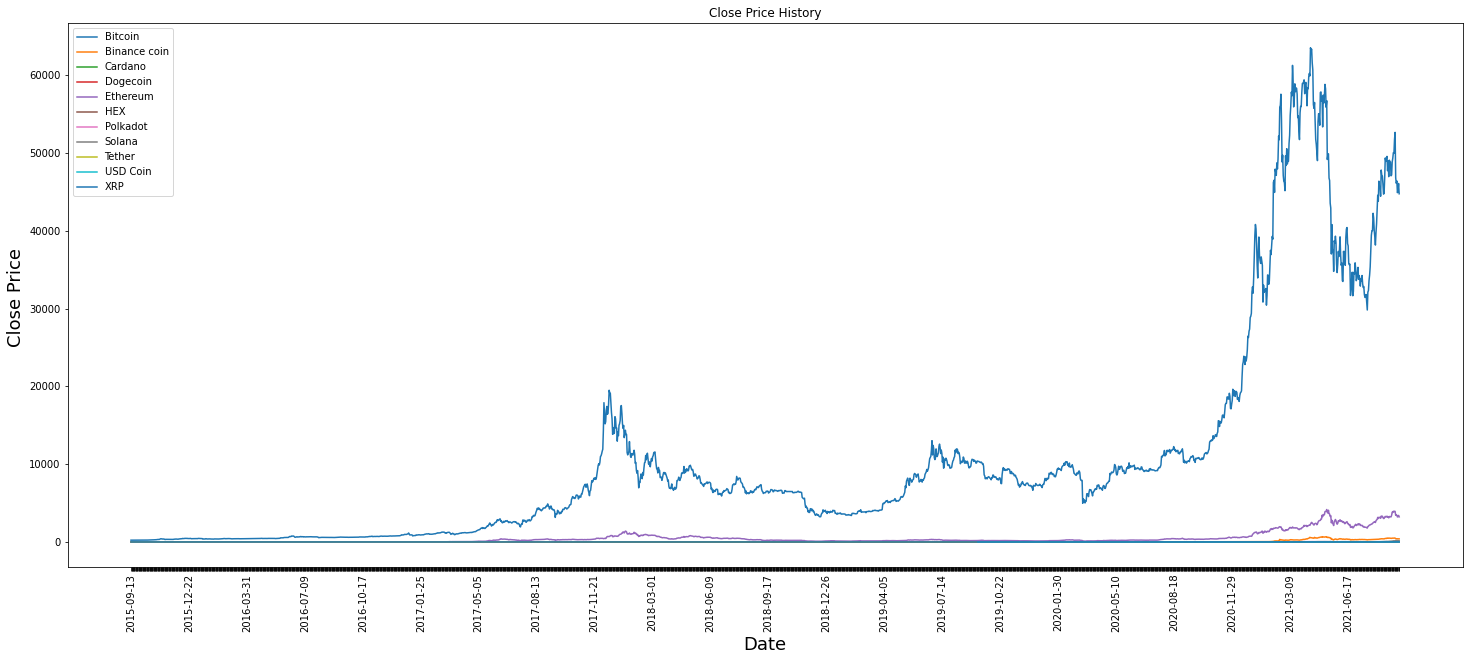

In [178]:
d2=bitcoin[['Close','Date']].dropna()
d1=binance_coin[['Close','Date']].dropna()
d3=cardano[['Close','Date']].dropna()
d4=dogecoin[['Close','Date']].dropna()
d5=ethereum[['Close','Date']].dropna()
d6=hex[['Close','Date']].dropna()
d7=polkadot[['Close','Date']].dropna()
d8=solana[['Close','Date']].dropna()
d9=tether[['Close','Date']].dropna()
d10=usd_coin[['Close','Date']].dropna()
d11=xrp[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="Bitcoin")
plt.plot(d1['Date'],d1['Close'],label="Binance coin")
plt.plot(d3['Date'],d3['Close'],label="Cardano")
plt.plot(d4['Date'],d4['Close'],label="Dogecoin")
plt.plot(d5['Date'],d5['Close'],label="Ethereum")
plt.plot(d6['Date'],d6['Close'],label="HEX")
plt.plot(d7['Date'],d7['Close'],label="Polkadot")
plt.plot(d8['Date'],d8['Close'],label="Solana")
plt.plot(d9['Date'],d9['Close'],label="Tether")
plt.plot(d10['Date'],d10['Close'],label="USD Coin")
plt.plot(d11['Date'],d11['Close'],label="XRP")
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

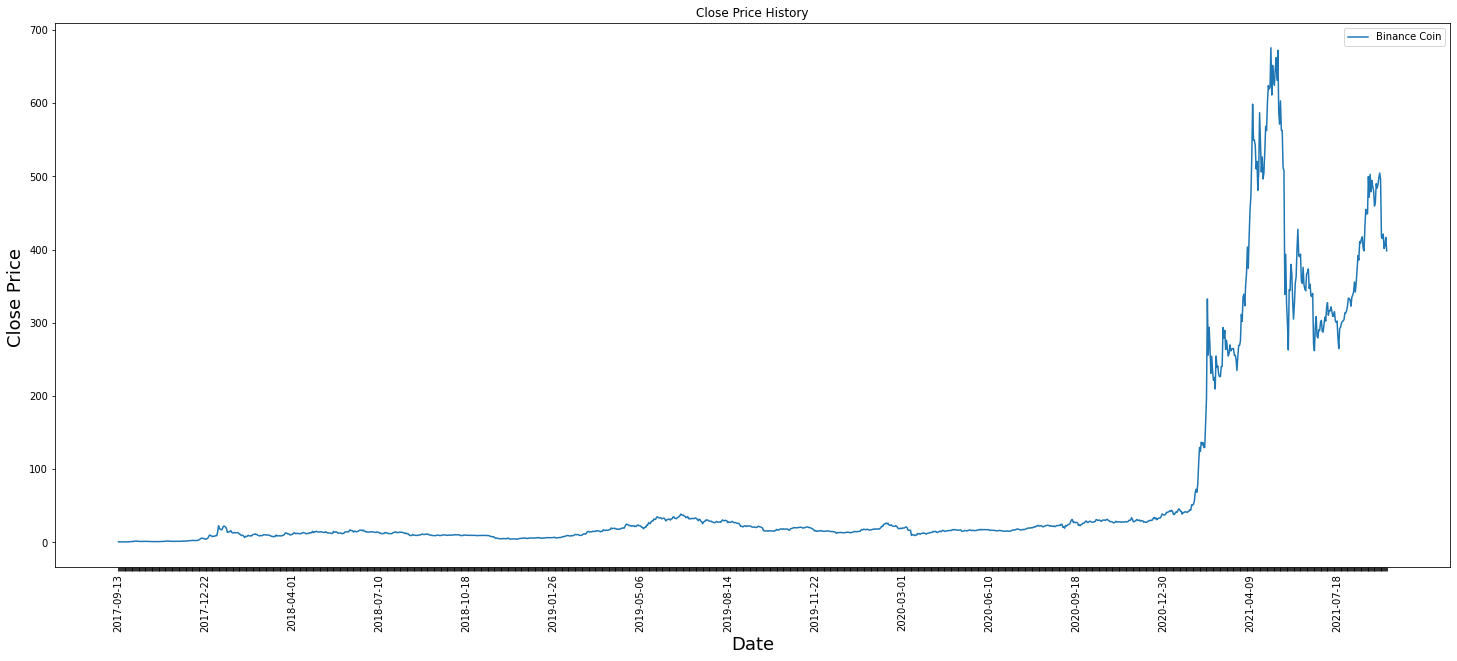

In [323]:
d2=binance_coin[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="Binance Coin")
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

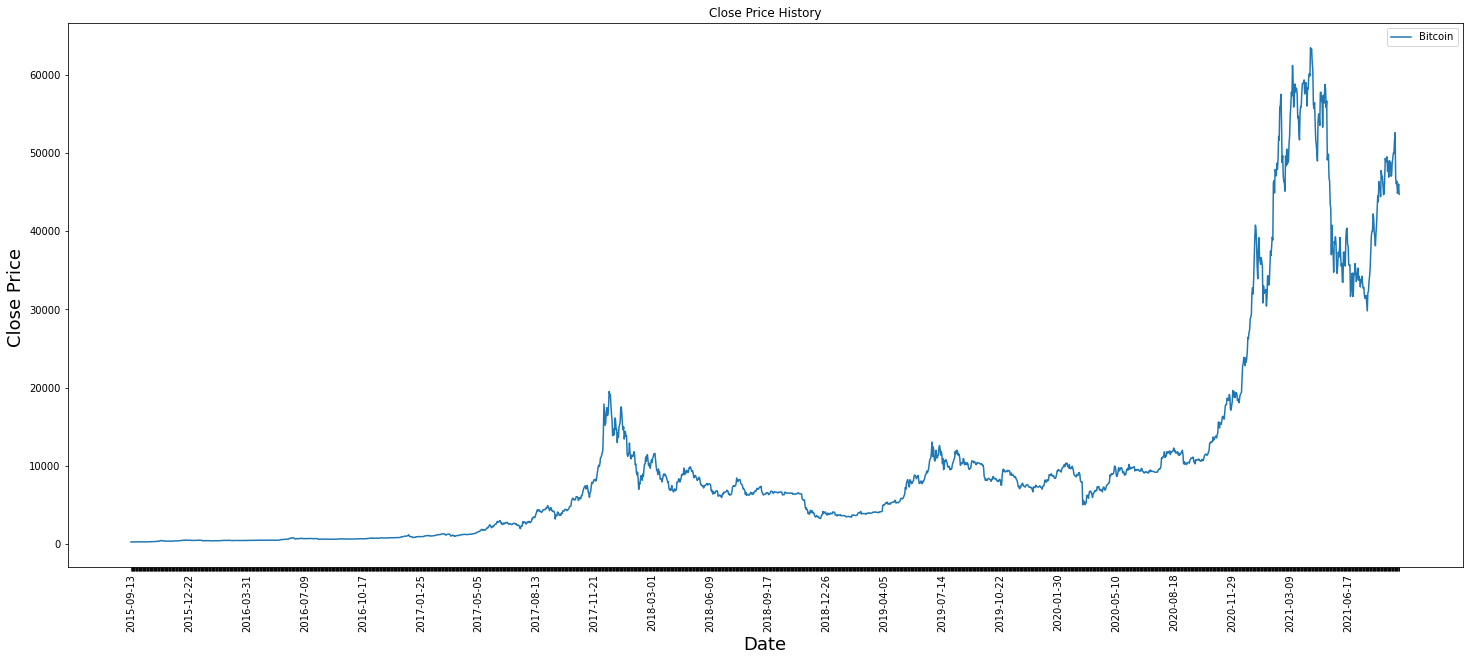

In [304]:
d2=bitcoin[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="Bitcoin")
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

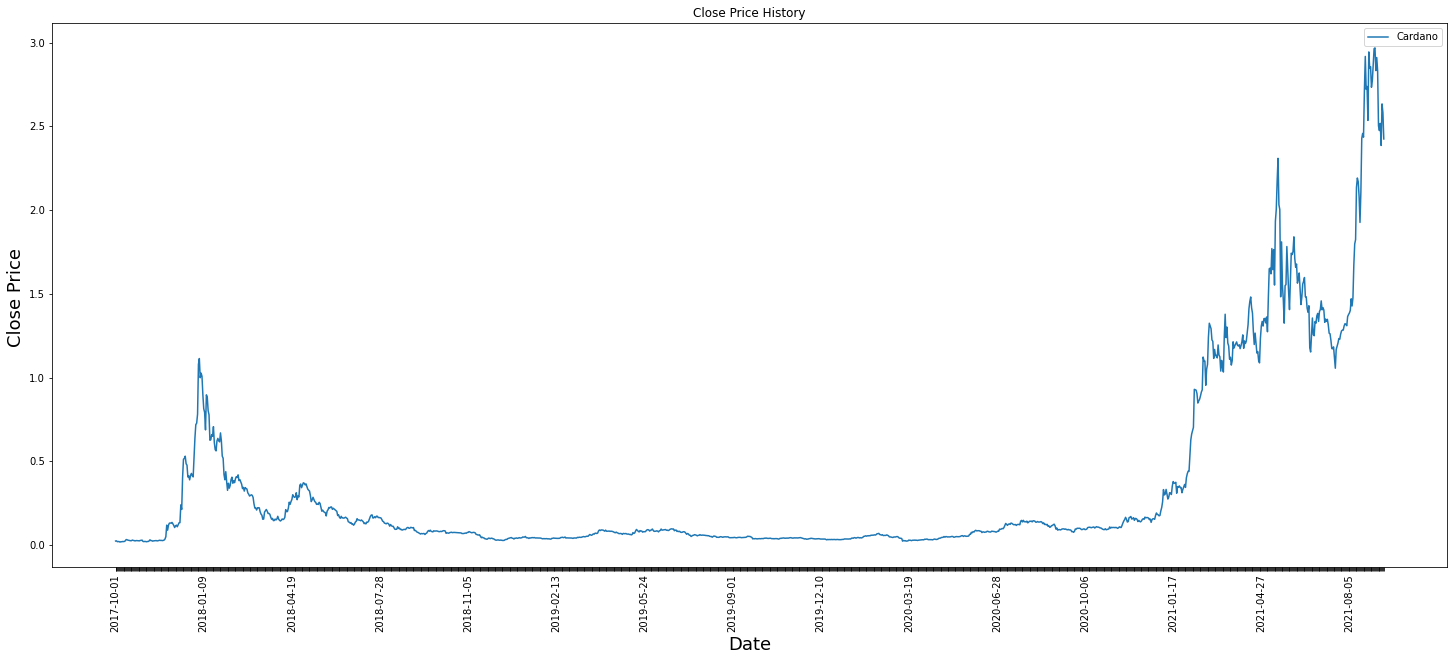

In [322]:
d2=cardano[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="Cardano")
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

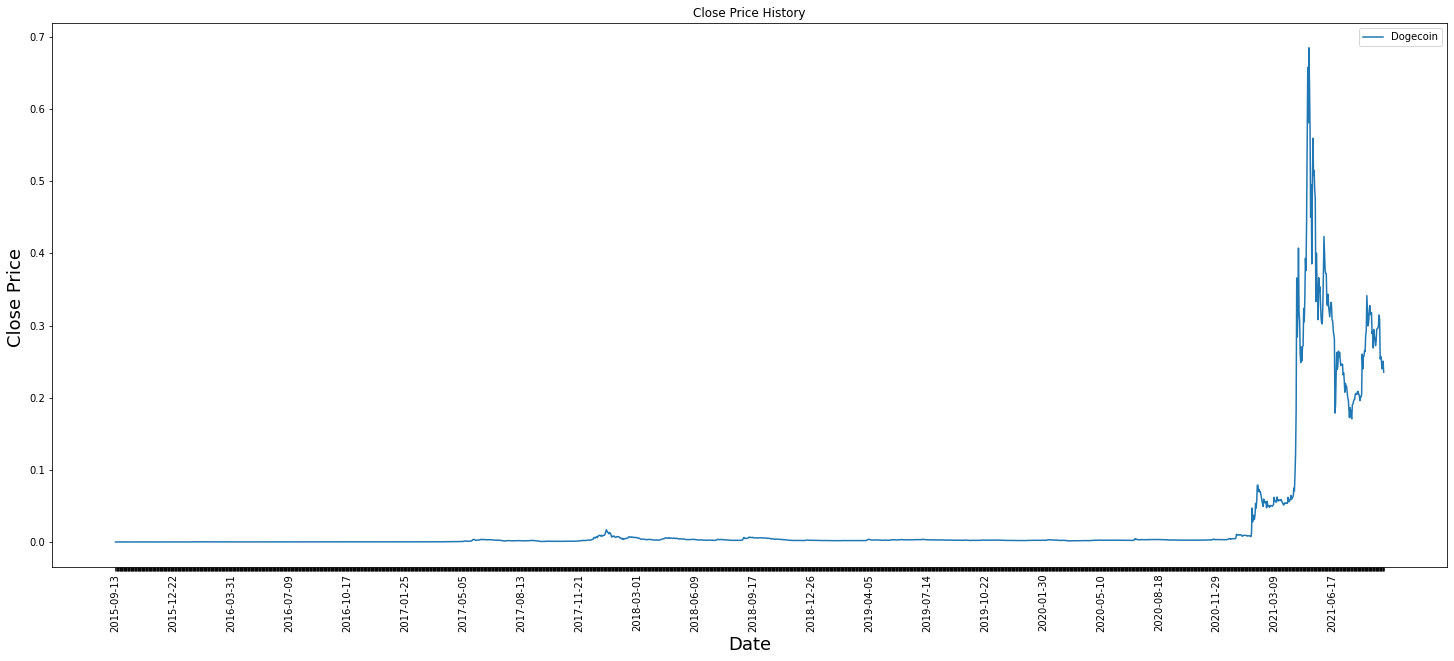

In [321]:
d2=dogecoin[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="Dogecoin")
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

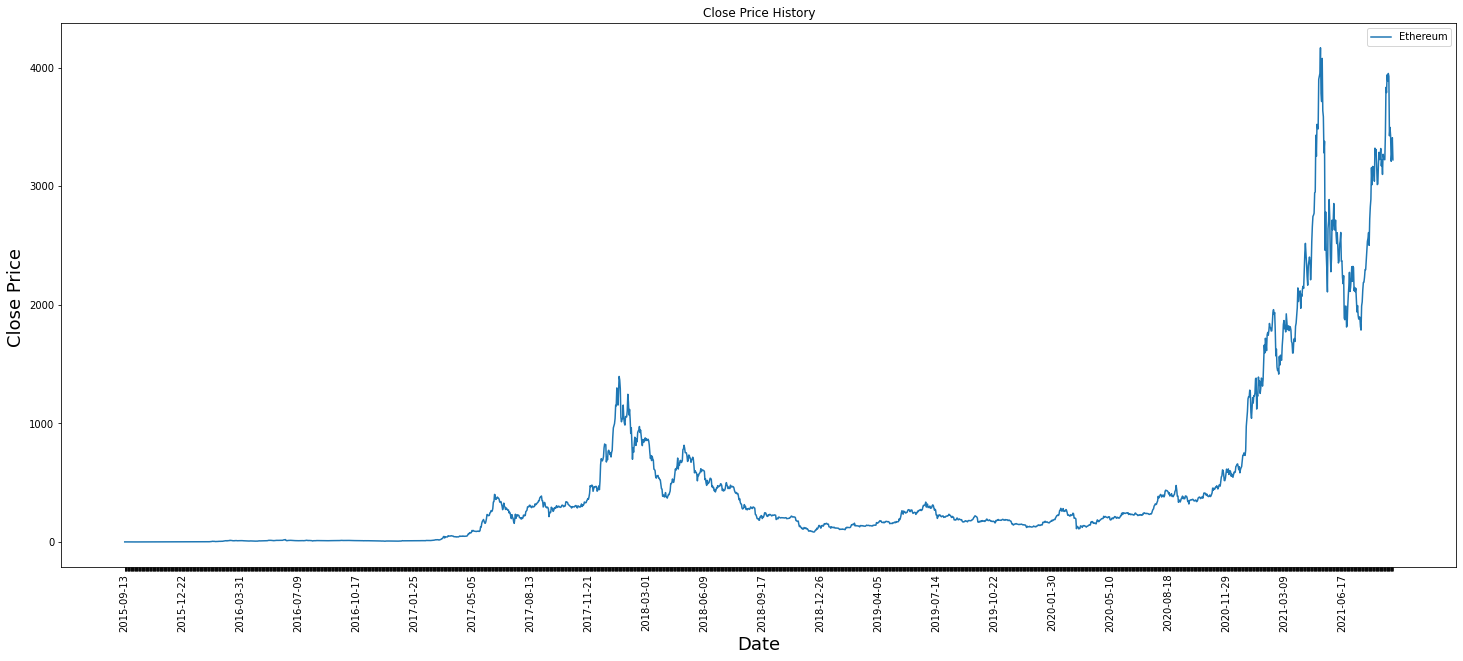

In [320]:
d2=ethereum[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="Ethereum")
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

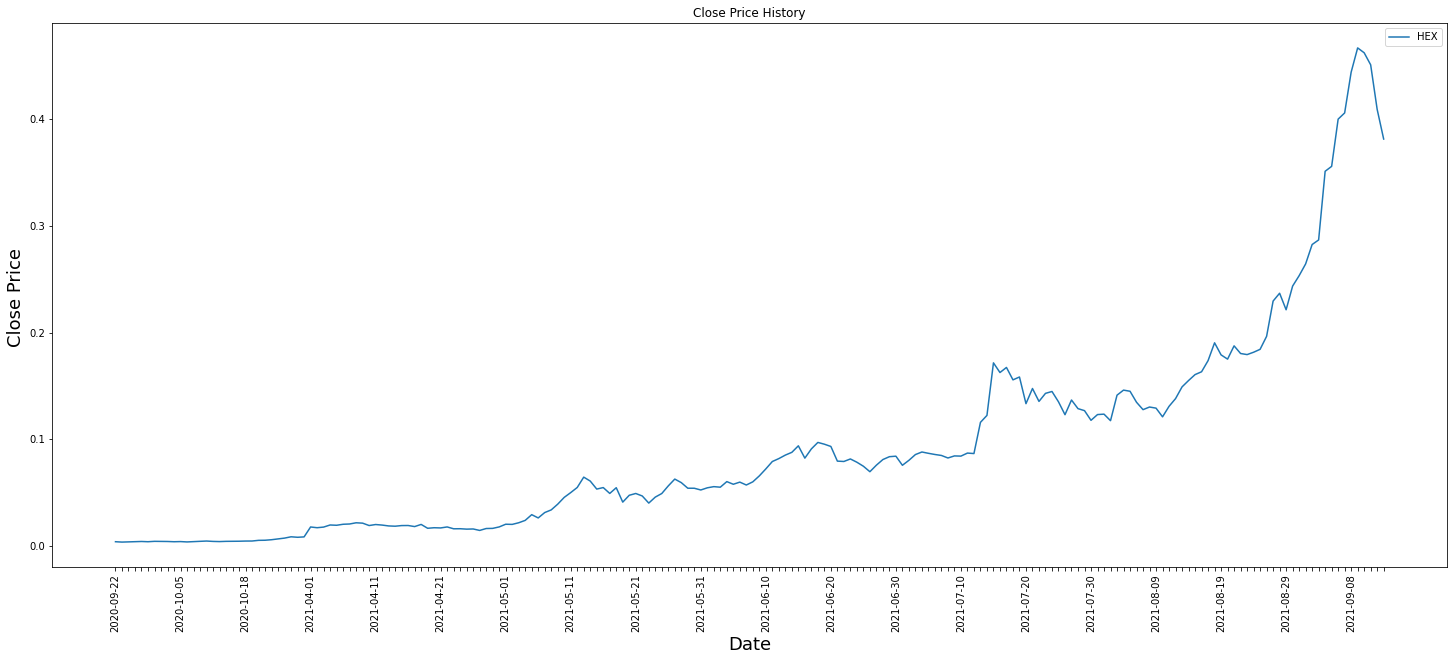

In [324]:
d2=hex[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="HEX")
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

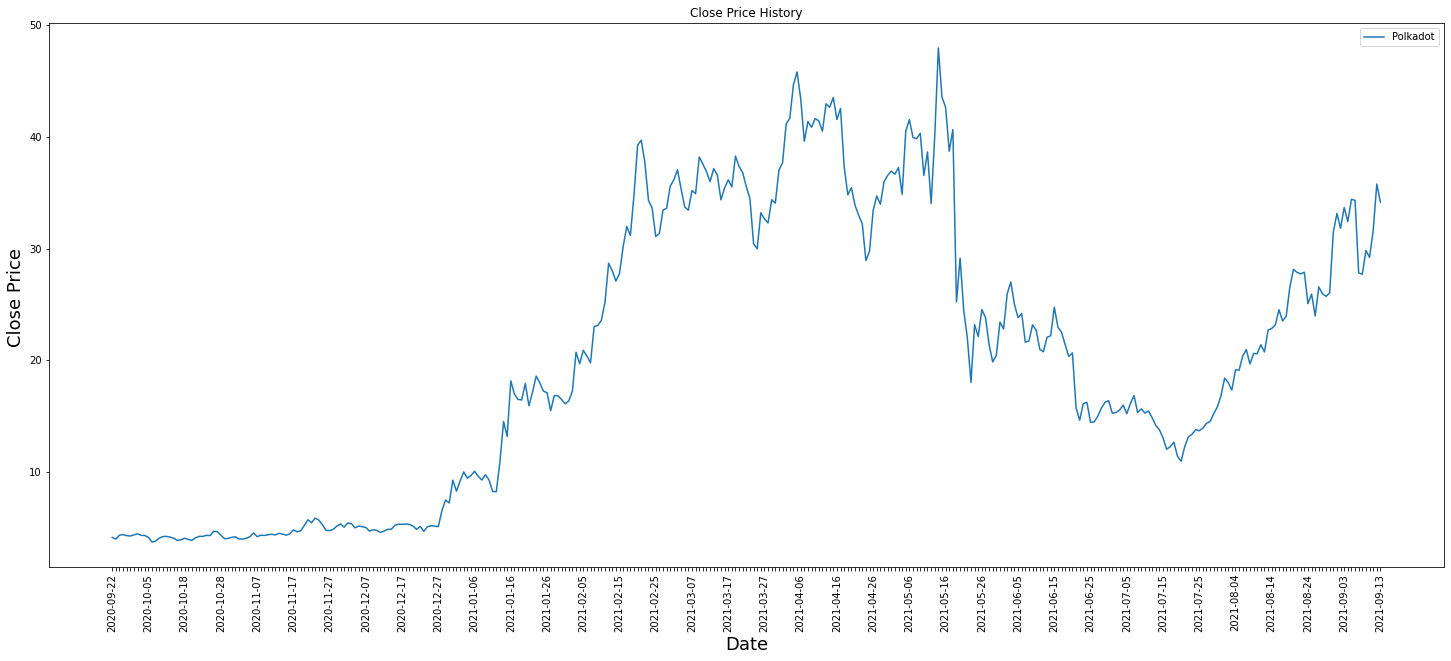

In [325]:
d2=polkadot[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="Polkadot")
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

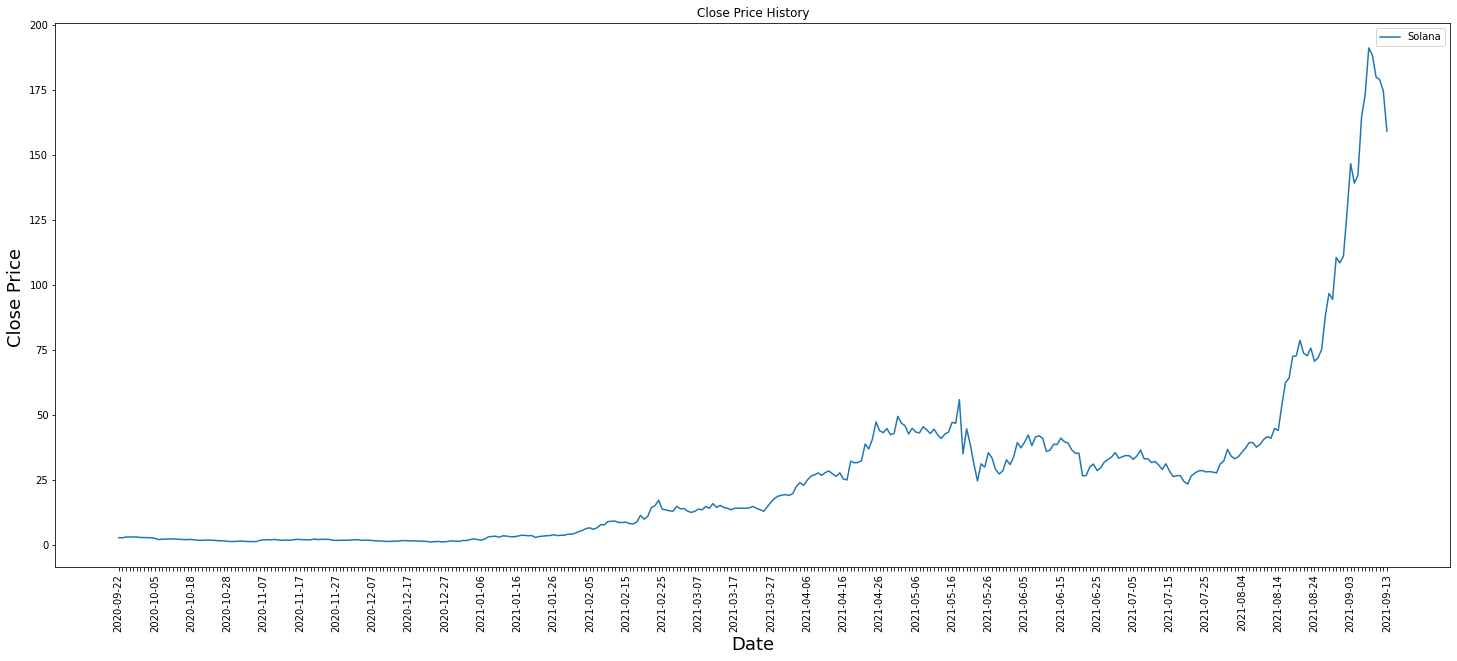

In [326]:
d2=solana[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="Solana")
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

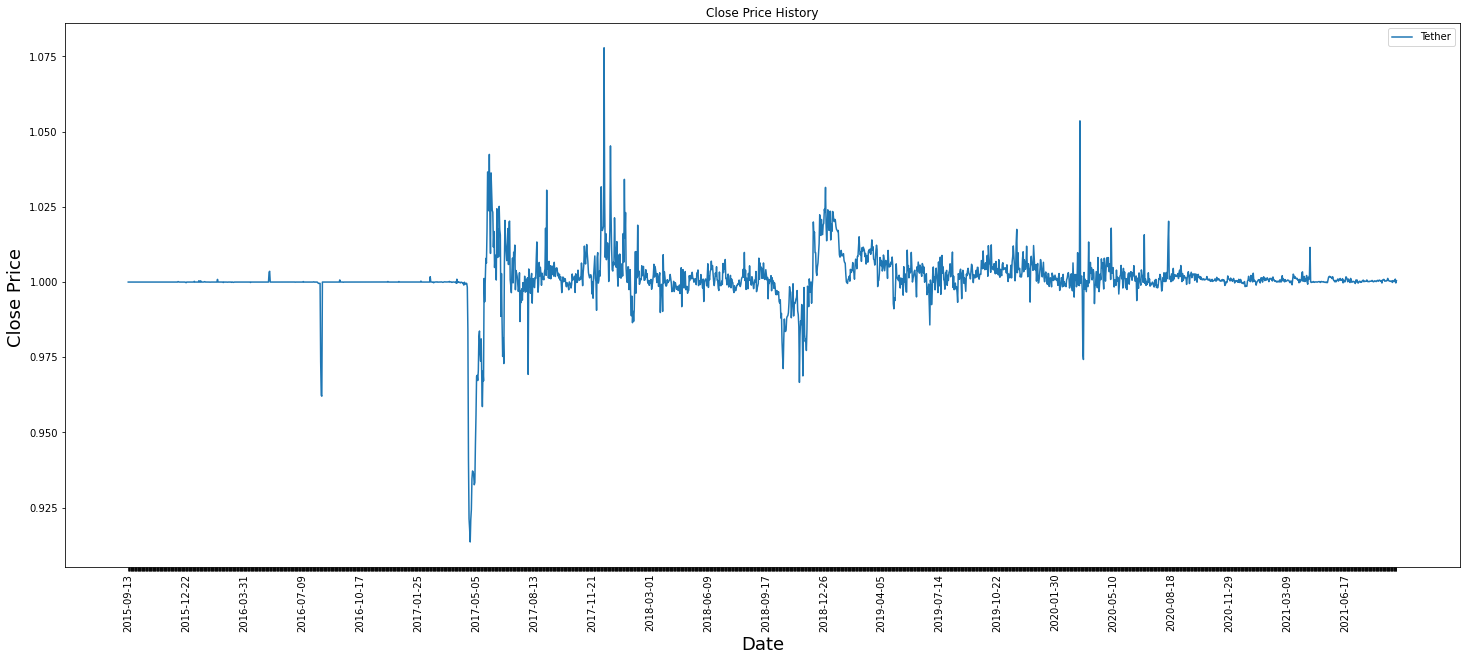

In [316]:
d2=tether[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="Tether")
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

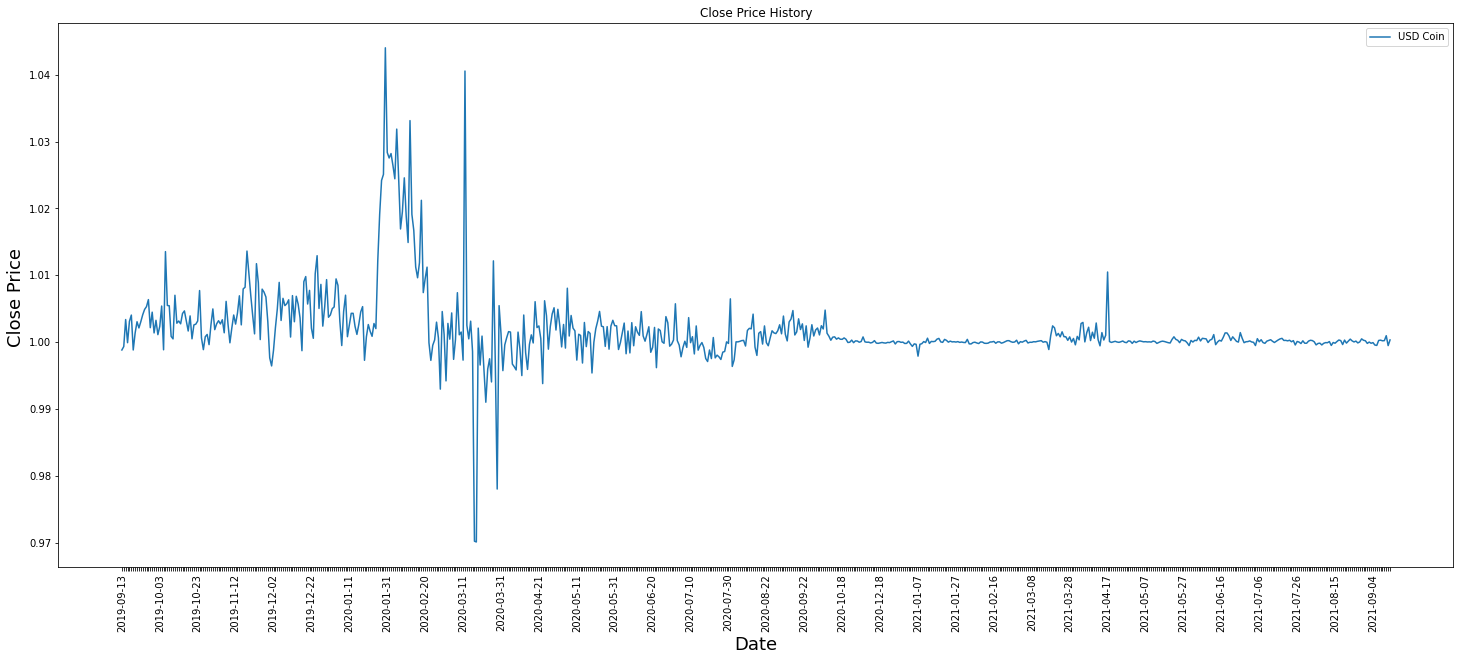

In [327]:
d2=usd_coin[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="USD Coin")
every_nth = 20
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

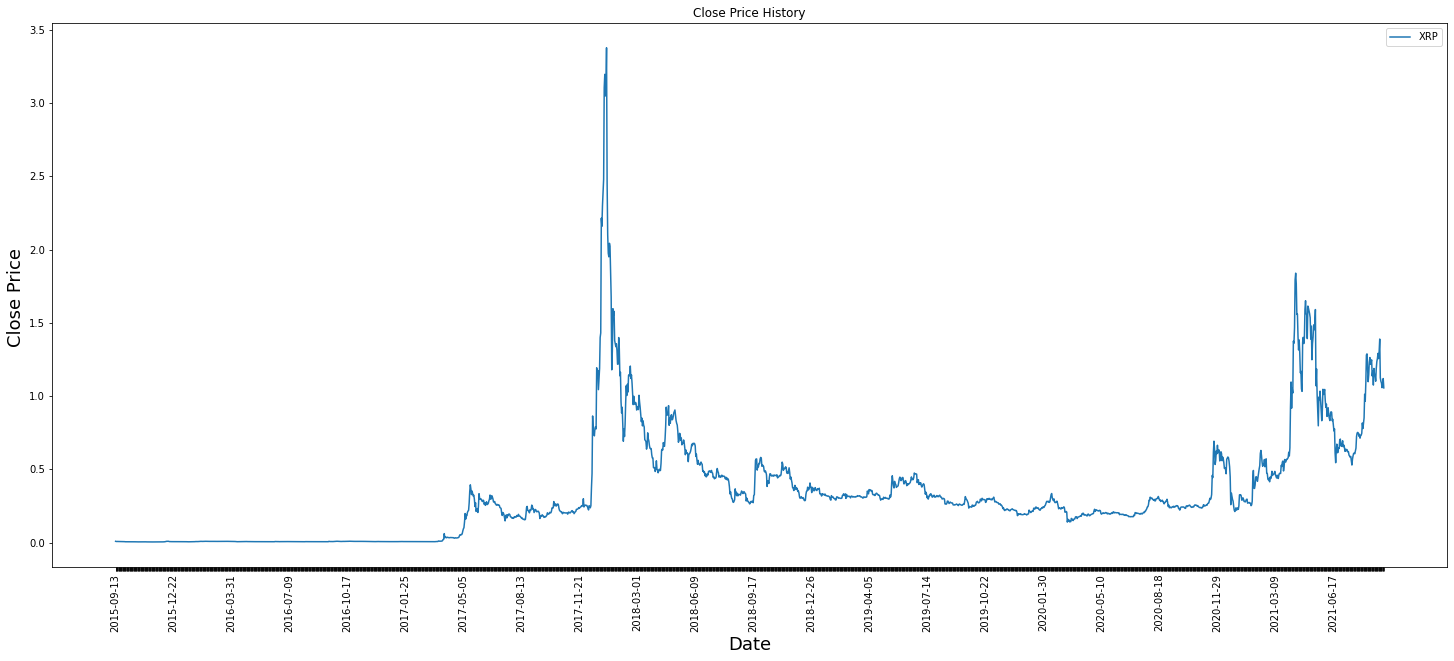

In [314]:
d2=xrp[['Close','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Close Price History')
plt.plot(d2['Date'],d2['Close'],label="XRP")
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plot for 'Volume' v/s 'Date'

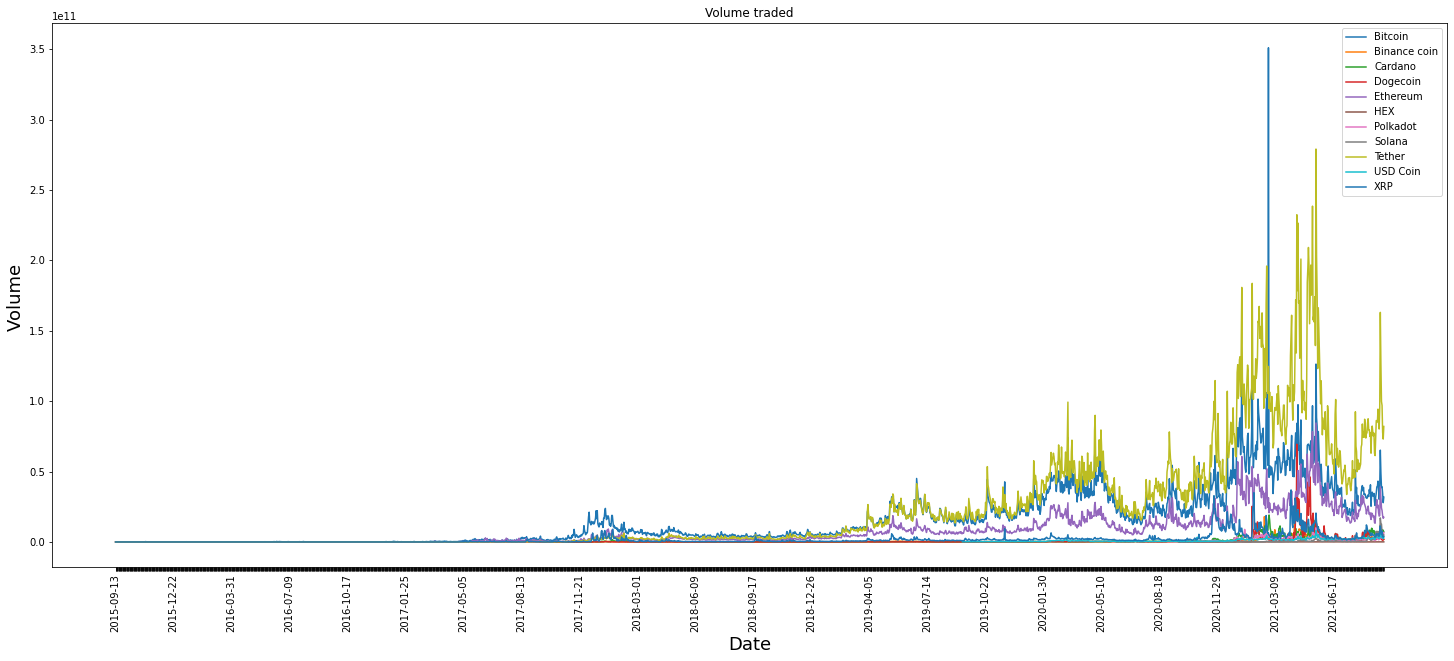

In [334]:
d2=bitcoin[['Volume','Date']].dropna()
d1=binance_coin[['Volume','Date']].dropna()
d3=cardano[['Volume','Date']].dropna()
d4=dogecoin[['Volume','Date']].dropna()
d5=ethereum[['Volume','Date']].dropna()
d6=hex[['Volume','Date']].dropna()
d7=polkadot[['Volume','Date']].dropna()
d8=solana[['Volume','Date']].dropna()
d9=tether[['Volume','Date']].dropna()
d10=usd_coin[['Volume','Date']].dropna()
d11=xrp[['Volume','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Volume traded')
plt.plot(d2['Date'],d2['Volume'],label="Bitcoin")
plt.plot(d1['Date'],d1['Volume'],label="Binance coin")
plt.plot(d3['Date'],d3['Volume'],label="Cardano")
plt.plot(d4['Date'],d4['Volume'],label="Dogecoin")
plt.plot(d5['Date'],d5['Volume'],label="Ethereum")
plt.plot(d6['Date'],d6['Volume'],label="HEX")
plt.plot(d7['Date'],d7['Volume'],label="Polkadot")
plt.plot(d8['Date'],d8['Volume'],label="Solana")
plt.plot(d9['Date'],d9['Volume'],label="Tether")
plt.plot(d10['Date'],d10['Volume'],label="USD Coin")
plt.plot(d11['Date'],d11['Volume'],label="XRP")
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

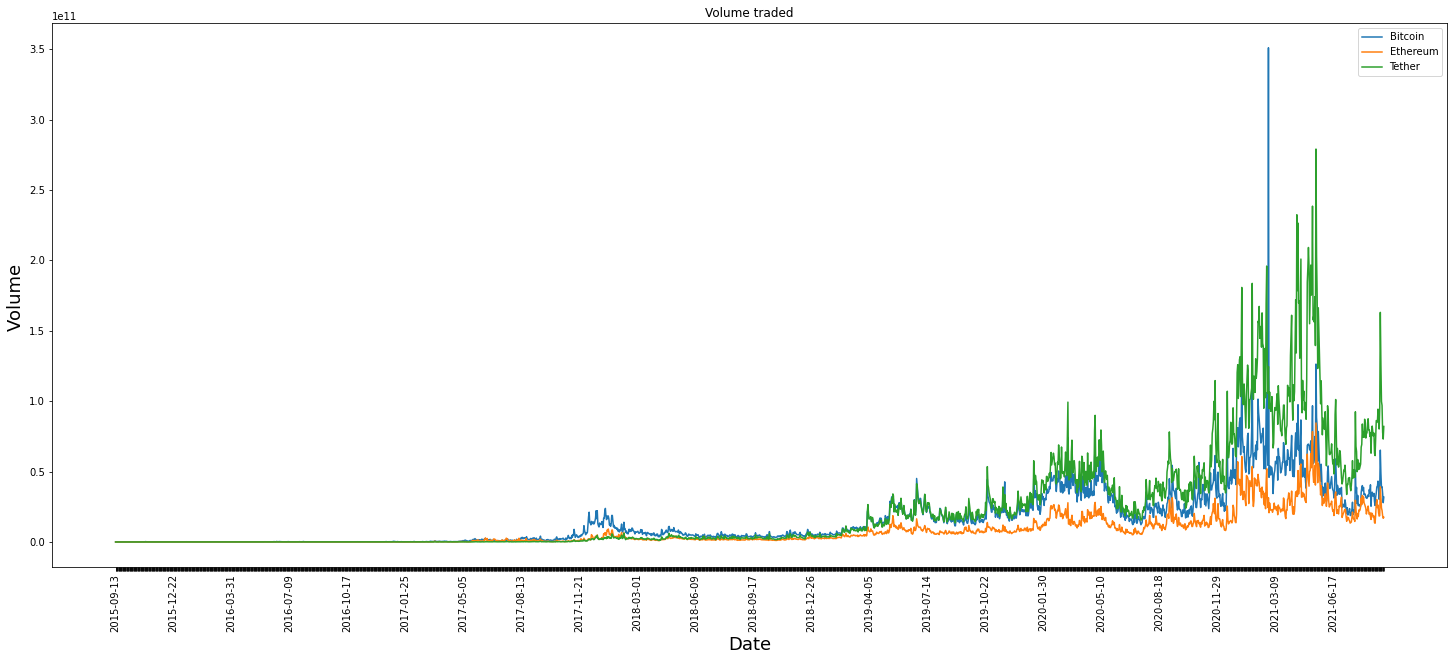

In [335]:
d2=bitcoin[['Volume','Date']].dropna()
d5=ethereum[['Volume','Date']].dropna()
d9=tether[['Volume','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Volume traded')
plt.plot(d2['Date'],d2['Volume'],label="Bitcoin")
plt.plot(d5['Date'],d5['Volume'],label="Ethereum")
plt.plot(d9['Date'],d9['Volume'],label="Tether")

every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume ', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

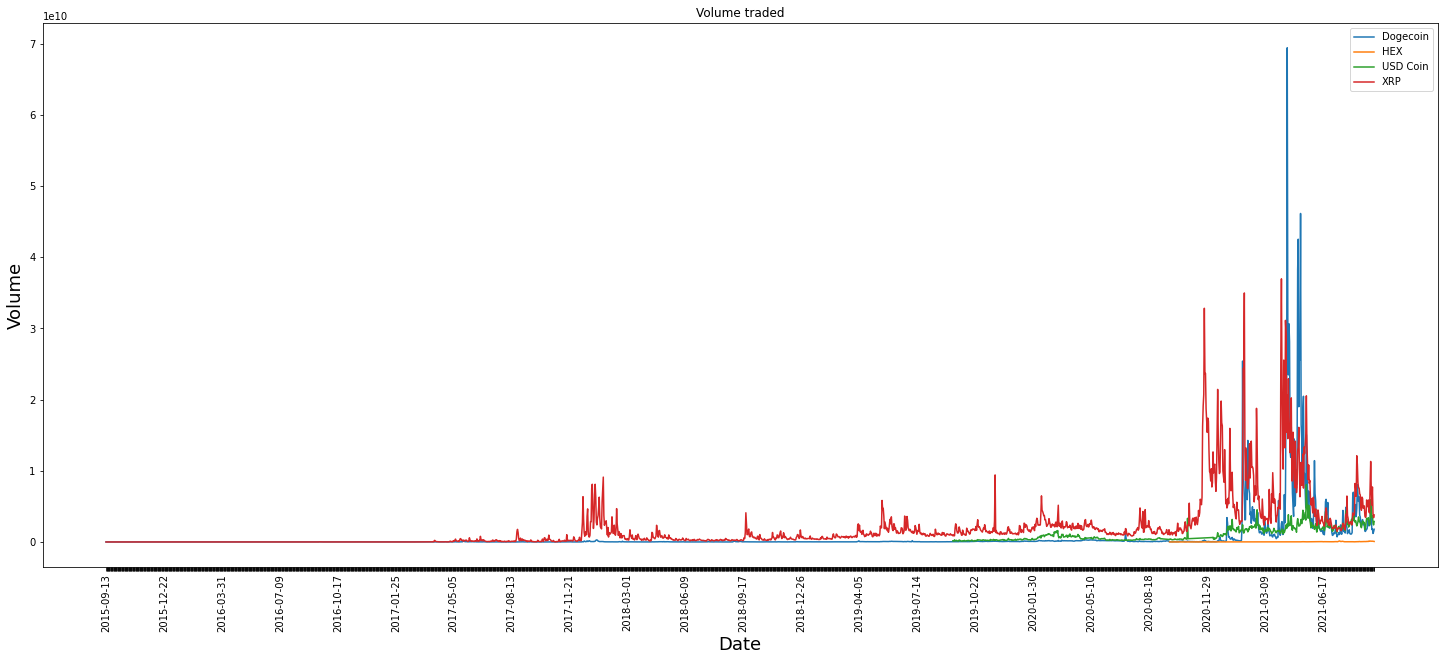

In [336]:

d4=dogecoin[['Volume','Date']].dropna()
d6=hex[['Volume','Date']].dropna()
d10=usd_coin[['Volume','Date']].dropna()
d11=xrp[['Volume','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Volume traded')

plt.plot(d4['Date'],d4['Volume'],label="Dogecoin")
plt.plot(d6['Date'],d6['Volume'],label="HEX")
plt.plot(d10['Date'],d10['Volume'],label="USD Coin")
plt.plot(d11['Date'],d11['Volume'],label="XRP")
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

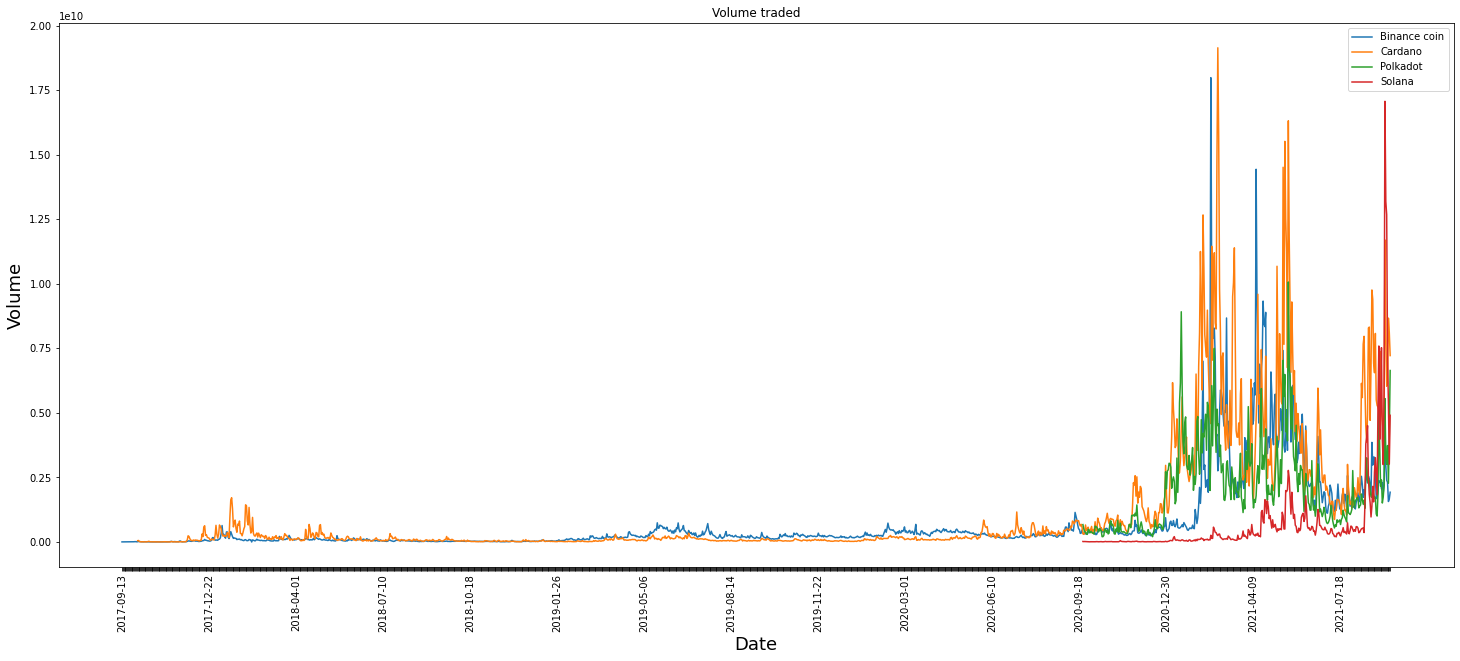

In [337]:

d1=binance_coin[['Volume','Date']].dropna()
d3=cardano[['Volume','Date']].dropna()
d7=polkadot[['Volume','Date']].dropna()
d8=solana[['Volume','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Volume traded')

plt.plot(d1['Date'],d1['Volume'],label="Binance coin")
plt.plot(d3['Date'],d3['Volume'],label="Cardano")
plt.plot(d7['Date'],d7['Volume'],label="Polkadot")
plt.plot(d8['Date'],d8['Volume'],label="Solana")

every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

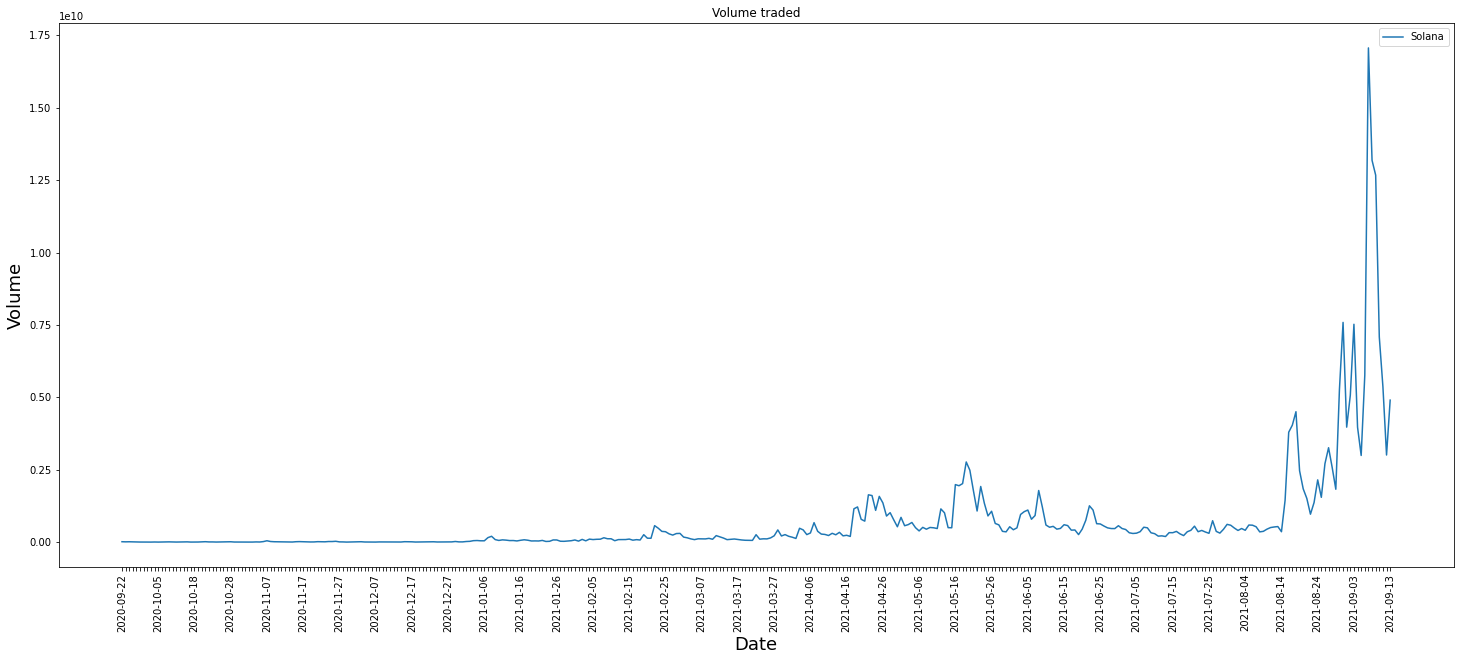

In [339]:

d8=solana[['Volume','Date']].dropna()
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Volume traded')

plt.plot(d8['Date'],d8['Volume'],label="Solana")

every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# in order to label only certain dates to make the graph axis cleaner
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.show()

#Binance Coin Prediction Model

In [179]:
dataset1=binance_coin[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

#Training Data

In [180]:
length=int(np.ceil(len(data)*0.8))
length

1167

In [181]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [182]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(100,len(train_data)):
    X_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [183]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# LSTM Model

In [184]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [185]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
1067/1067 [==============================] - 63s 56ms/step - loss: 2.5021e-05
Epoch 2/3
1067/1067 [==============================] - 59s 55ms/step - loss: 1.3761e-05
Epoch 3/3
1067/1067 [==============================] - 58s 55ms/step - loss: 9.5447e-06


# Test Dataset

In [186]:
test_data=scaled_data[length-100:,:]

X_test=[]
y_test=data[length:,:]

for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [187]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

27.7902626974072

In [188]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
1167,2020-11-27,28.475187,31.276487
1168,2020-11-28,29.143911,29.772404
1169,2020-11-29,30.117603,29.342709
1170,2020-11-30,31.392786,29.883392
1171,2020-12-01,30.108303,31.103159
...,...,...,...
1453,2021-09-09,421.270020,422.975311
1454,2021-09-10,401.621796,407.984680
1455,2021-09-11,405.527374,396.154663
1456,2021-09-12,416.683228,393.290802


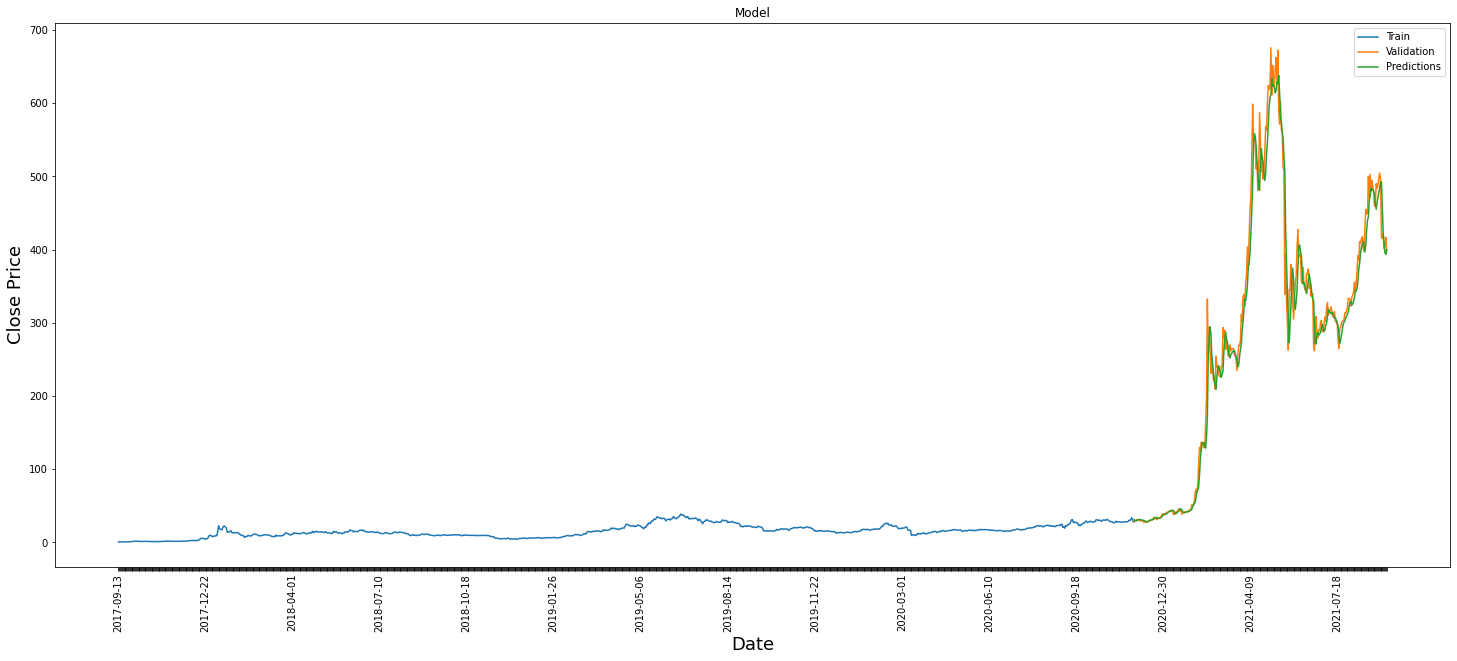

In [189]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()

# Bitcoin Prediction Model

In [190]:
dataset1=bitcoin[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

# Training Data

In [191]:
length=int(np.ceil(len(data)*0.8))
length

1752

In [192]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [193]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(100,len(train_data)):
    X_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [194]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#LSTM Model

In [195]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [196]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1652/1652 [==============================] - 94s 55ms/step - loss: 2.5370e-04
Epoch 2/5
1652/1652 [==============================] - 91s 55ms/step - loss: 1.0201e-04
Epoch 3/5
1652/1652 [==============================] - 92s 56ms/step - loss: 9.5926e-05
Epoch 4/5
1652/1652 [==============================] - 93s 56ms/step - loss: 6.8555e-05
Epoch 5/5
1652/1652 [==============================] - 95s 58ms/step - loss: 7.4321e-05


# Test Dataset

In [197]:
test_data=scaled_data[length-100:,:]

X_test=[]
y_test=data[length:,:]

for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [198]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6113.487354447242

In [199]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
1752,2020-07-01,9228.325195,9082.786133
1753,2020-07-02,9123.410156,9152.724609
1754,2020-07-03,9087.303711,9064.897461
1755,2020-07-04,9132.488281,9030.732422
1756,2020-07-05,9073.942383,9068.923828
...,...,...,...
2184,2021-09-09,46391.421875,38499.667969
2185,2021-09-10,44883.910156,38954.859375
2186,2021-09-11,45201.457031,37590.187500
2187,2021-09-12,46063.269531,38133.589844


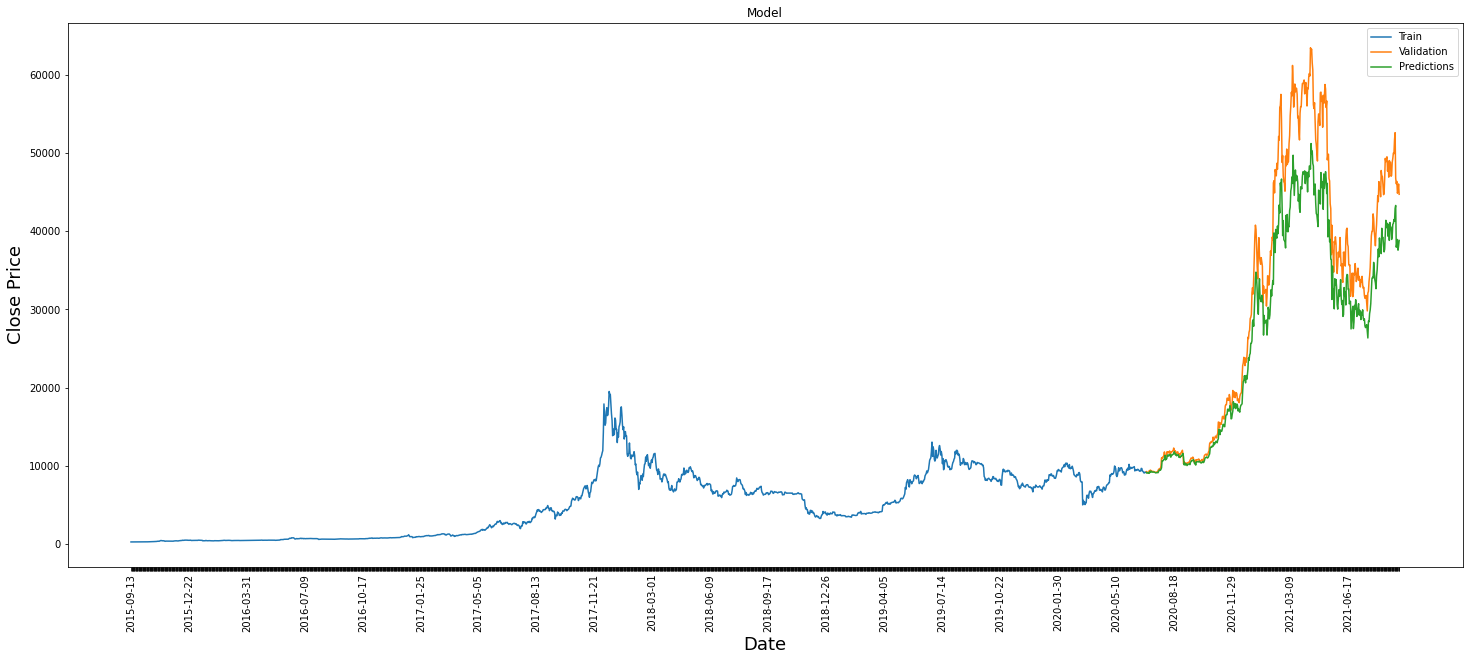

In [200]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#Cardano Prediction Model

In [201]:
dataset1=cardano[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

#Training Data

In [202]:
length=int(np.ceil(len(data)*0.8))
length

1152

In [203]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [204]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(100,len(train_data)):
    X_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [205]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#LSTM Model

In [206]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [207]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1052/1052 [==============================] - 62s 56ms/step - loss: 2.3541e-04
Epoch 2/5
1052/1052 [==============================] - 58s 55ms/step - loss: 1.5082e-04
Epoch 3/5
1052/1052 [==============================] - 57s 54ms/step - loss: 1.0251e-04
Epoch 4/5
1052/1052 [==============================] - 57s 54ms/step - loss: 7.8099e-05
Epoch 5/5
1052/1052 [==============================] - 58s 55ms/step - loss: 1.1565e-04


#Test Dataset

In [208]:
test_data=scaled_data[length-100:,:]

X_test=[]
y_test=data[length:,:]

for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [209]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.30166373407125

In [210]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
1152,2020-11-30,0.171308,0.173394
1153,2020-12-01,0.155983,0.177918
1154,2020-12-02,0.158557,0.172784
1155,2020-12-03,0.164212,0.170688
1156,2020-12-04,0.148241,0.173407
...,...,...,...
1435,2021-09-09,2.517666,1.929466
1436,2021-09-10,2.385911,1.938268
1437,2021-09-11,2.633950,1.900742
1438,2021-09-12,2.581727,1.958644


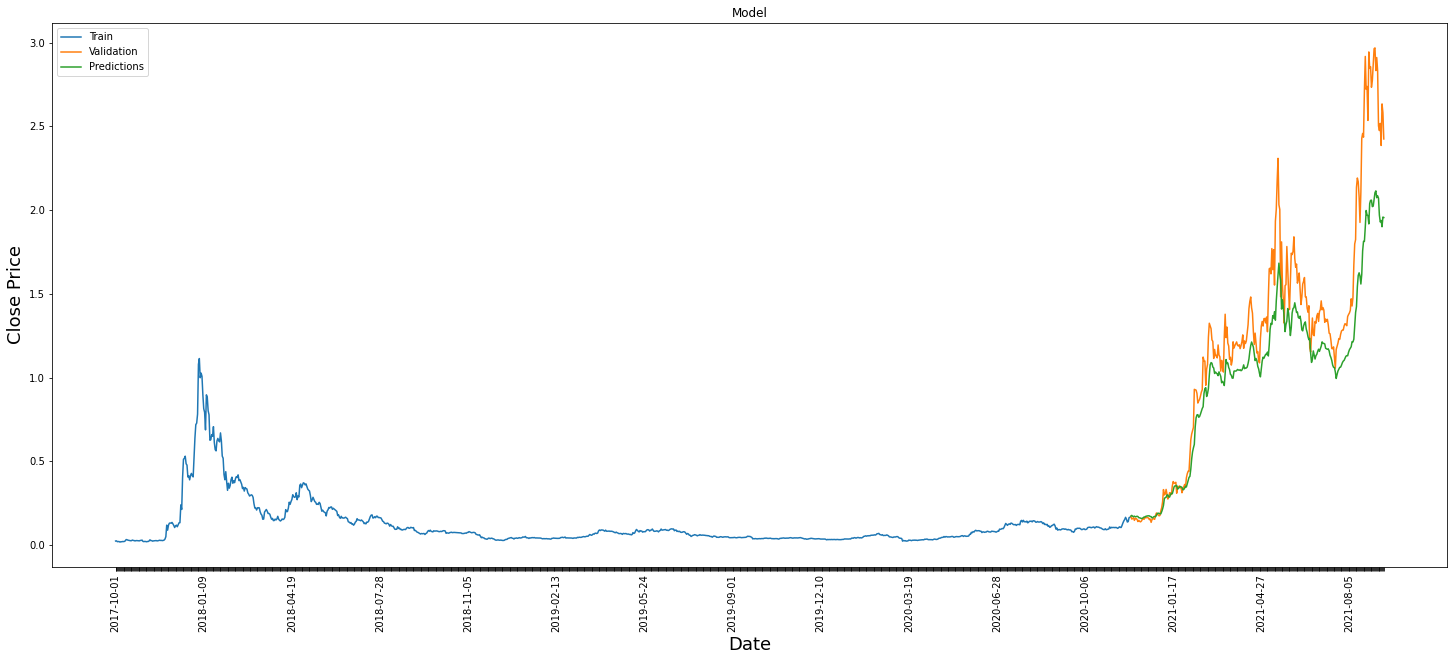

In [211]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#Dogecoin Prediction Model

In [212]:
dataset1=dogecoin[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

#Training Data

In [213]:
length=int(np.ceil(len(data)*0.8))
length

1752

In [214]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [215]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(100,len(train_data)):
    X_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [216]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#LSTM Model

In [217]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [218]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1652/1652 [==============================] - 94s 55ms/step - loss: 5.6635e-06
Epoch 2/5
1652/1652 [==============================] - 90s 54ms/step - loss: 2.6638e-06
Epoch 3/5
1652/1652 [==============================] - 89s 54ms/step - loss: 1.5485e-06
Epoch 4/5
1652/1652 [==============================] - 89s 54ms/step - loss: 1.3251e-06
Epoch 5/5
1652/1652 [==============================] - 91s 55ms/step - loss: 1.2631e-06


#Test Dataset

In [219]:
test_data=scaled_data[length-100:,:]

X_test=[]
y_test=data[length:,:]

for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [220]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.037635262576499

In [221]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
1752,2020-07-01,0.002354,0.001723
1753,2020-07-02,0.002361,0.001737
1754,2020-07-03,0.002316,0.001755
1755,2020-07-04,0.002309,0.001750
1756,2020-07-05,0.002309,0.001739
...,...,...,...
2184,2021-09-09,0.252596,0.247505
2185,2021-09-10,0.239982,0.237017
2186,2021-09-11,0.241432,0.227011
2187,2021-09-12,0.250617,0.221230


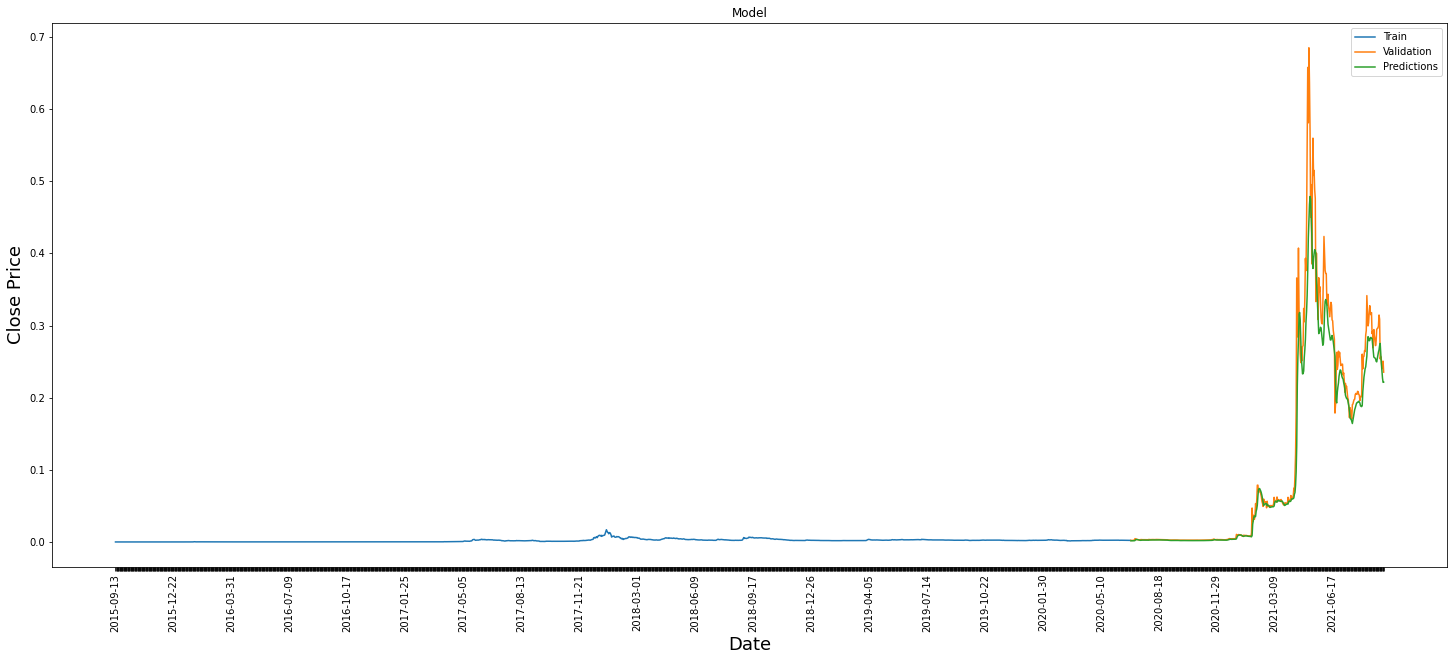

In [222]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#Ethereum Prediction model

In [223]:
dataset1=dogecoin[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

#Training Data

In [224]:
length=int(np.ceil(len(data)*0.8))
length

1752

In [225]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [226]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(100,len(train_data)):
    X_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [227]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#LSTM Model

In [228]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [229]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1652/1652 [==============================] - 96s 55ms/step - loss: 5.7485e-06
Epoch 2/5
1652/1652 [==============================] - 91s 55ms/step - loss: 3.9982e-06
Epoch 3/5
1652/1652 [==============================] - 91s 55ms/step - loss: 1.4849e-06
Epoch 4/5
1652/1652 [==============================] - 91s 55ms/step - loss: 1.3203e-06
Epoch 5/5
1652/1652 [==============================] - 91s 55ms/step - loss: 1.0656e-06


#Test Dataset

In [230]:
test_data=scaled_data[length-100:,:]

X_test=[]
y_test=data[length:,:]

for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [231]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.04976071032779888

In [232]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
1752,2020-07-01,0.002354,0.001968
1753,2020-07-02,0.002361,0.001981
1754,2020-07-03,0.002316,0.001998
1755,2020-07-04,0.002309,0.001996
1756,2020-07-05,0.002309,0.001988
...,...,...,...
2184,2021-09-09,0.252596,0.226193
2185,2021-09-10,0.239982,0.215998
2186,2021-09-11,0.241432,0.206568
2187,2021-09-12,0.250617,0.200935


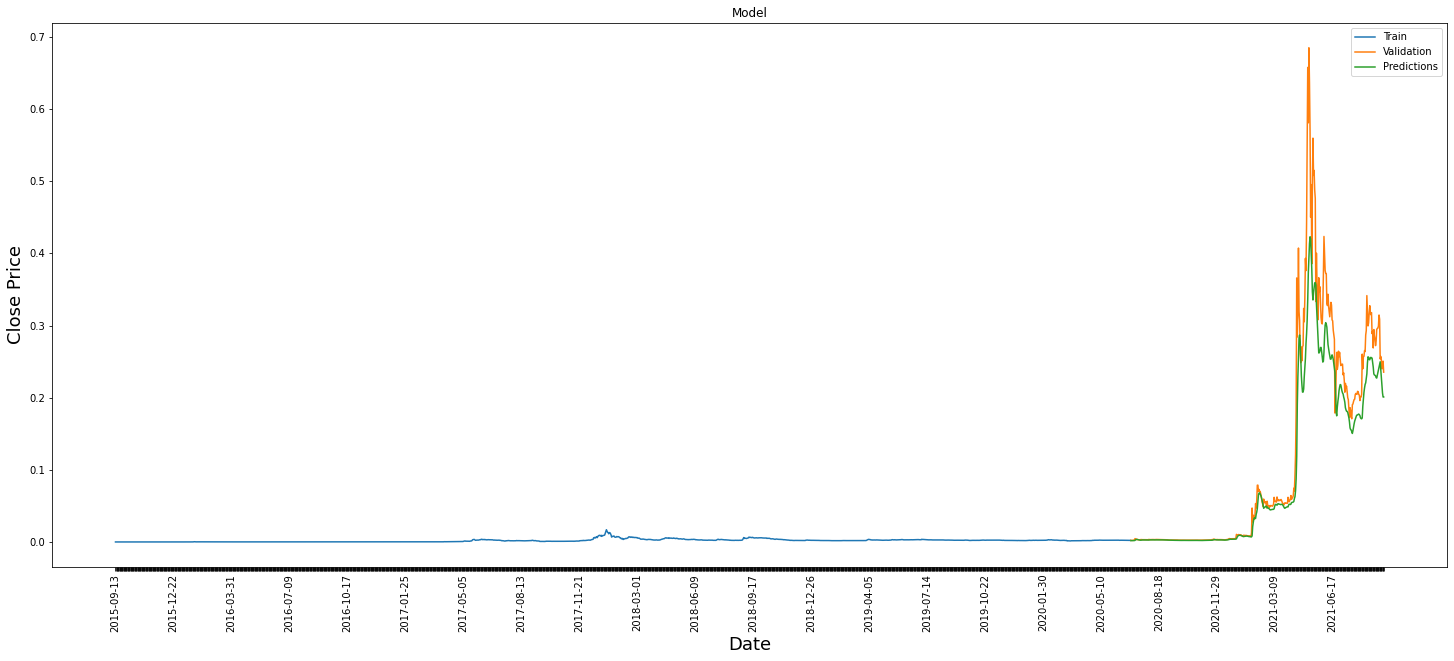

In [233]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#HEX Prediction model

In [234]:
dataset1=hex[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

#Training Data

In [235]:
length=int(np.ceil(len(data)*0.8))
length

157

In [236]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [237]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(50,len(train_data)):
    X_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])

In [238]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#LSTM Model

In [239]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [240]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
107/107 [==============================] - 6s 30ms/step - loss: 0.0034
Epoch 2/10
107/107 [==============================] - 3s 30ms/step - loss: 0.0022
Epoch 3/10
107/107 [==============================] - 3s 30ms/step - loss: 0.0019
Epoch 4/10
107/107 [==============================] - 3s 29ms/step - loss: 0.0012
Epoch 5/10
107/107 [==============================] - 3s 29ms/step - loss: 0.0010
Epoch 6/10
107/107 [==============================] - 3s 29ms/step - loss: 0.0013
Epoch 7/10
107/107 [==============================] - 3s 29ms/step - loss: 8.5117e-04
Epoch 8/10
107/107 [==============================] - 3s 29ms/step - loss: 7.8529e-04
Epoch 9/10
107/107 [==============================] - 3s 29ms/step - loss: 8.5398e-04
Epoch 10/10
107/107 [==============================] - 3s 30ms/step - loss: 7.0699e-04


#Test Dataset

In [241]:
test_data=scaled_data[length-50:,:]

X_test=[]
y_test=data[length:,:]

for i in range(50,len(test_data)):
    X_test.append(test_data[i-50:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [242]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.03515954041214873

In [243]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
157,2021-08-06,0.134564,0.156684
158,2021-08-07,0.127658,0.154117
159,2021-08-08,0.130114,0.147959
160,2021-08-09,0.129064,0.144203
161,2021-08-10,0.120919,0.142303
162,2021-08-11,0.130774,0.138889
163,2021-08-12,0.138004,0.140297
164,2021-08-13,0.149009,0.145198
165,2021-08-14,0.154972,0.153138
166,2021-08-15,0.160524,0.160684


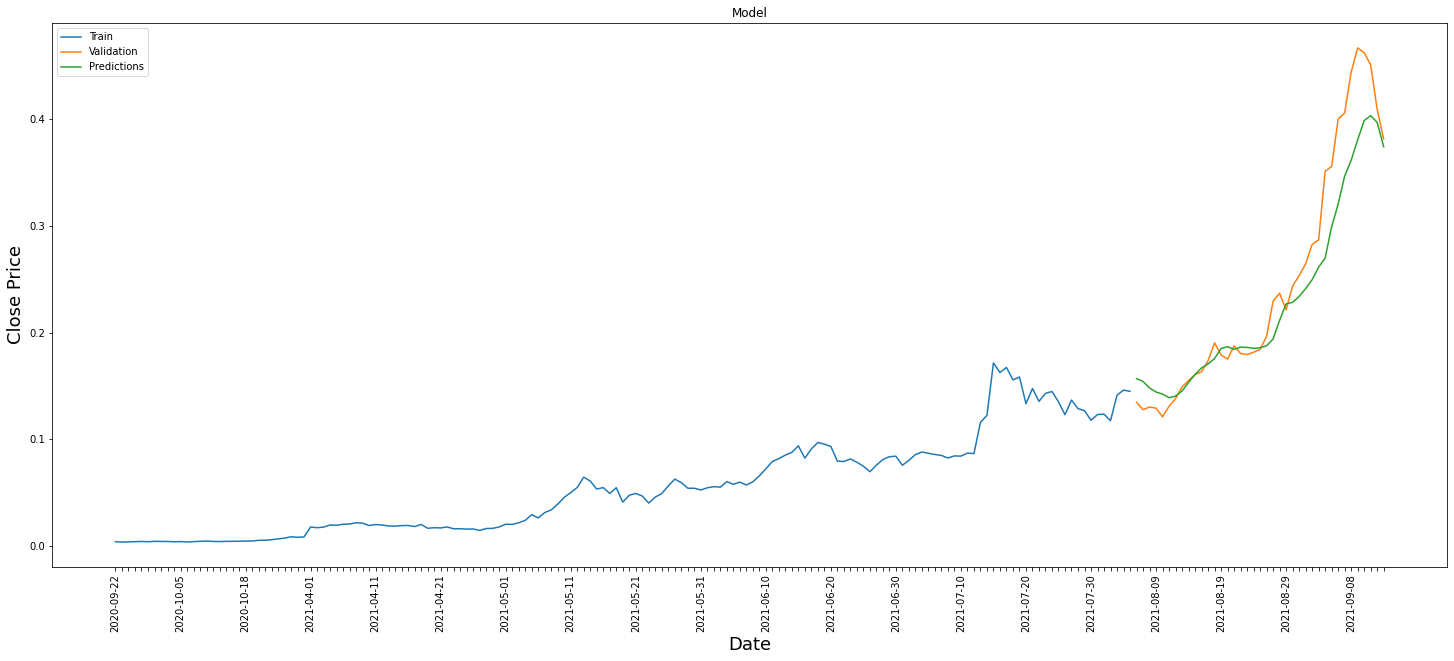

In [244]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#Polkadot Prediction Model

In [245]:
dataset1=polkadot[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

#Training Data

In [246]:
length=int(np.ceil(len(data)*0.8))
length

281

In [247]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [248]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(100,len(train_data)):
    X_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [249]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#LSTM Model

In [250]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [251]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
181/181 [==============================] - 13s 54ms/step - loss: 0.0209
Epoch 2/10
181/181 [==============================] - 10s 54ms/step - loss: 0.0125
Epoch 3/10
181/181 [==============================] - 10s 54ms/step - loss: 0.0090
Epoch 4/10
181/181 [==============================] - 10s 55ms/step - loss: 0.0071
Epoch 5/10
181/181 [==============================] - 10s 54ms/step - loss: 0.0059
Epoch 6/10
181/181 [==============================] - 10s 55ms/step - loss: 0.0054
Epoch 7/10
181/181 [==============================] - 10s 56ms/step - loss: 0.0047
Epoch 8/10
181/181 [==============================] - 10s 56ms/step - loss: 0.0039
Epoch 9/10
181/181 [==============================] - 10s 55ms/step - loss: 0.0041
Epoch 10/10
181/181 [==============================] - 10s 57ms/step - loss: 0.0050


#Test Dataset

In [252]:
test_data=scaled_data[length-100:,:]

X_test=[]
y_test=data[length:,:]

for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [253]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.26575822529171

In [254]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
281,2021-07-06,16.143564,17.438446
282,2021-07-07,16.857790,17.753780
283,2021-07-08,15.337748,18.397945
284,2021-07-09,15.669269,17.895905
285,2021-07-10,15.290839,17.634361
...,...,...,...
346,2021-09-09,29.835569,29.817936
347,2021-09-10,29.215357,30.959589
348,2021-09-11,31.594603,31.619951
349,2021-09-12,35.774338,33.442780


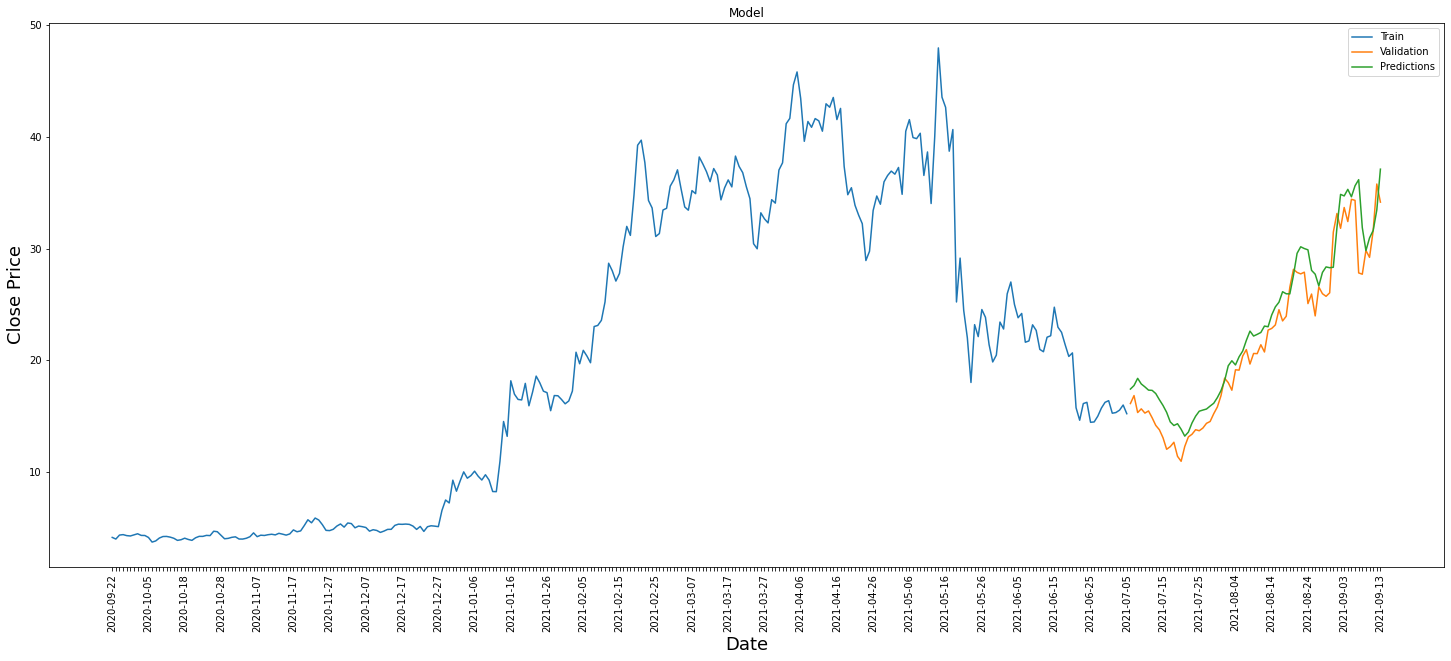

In [255]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#Solana Prediction Model

In [256]:
dataset1=solana[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

#Tranining Data

In [257]:
length=int(np.ceil(len(data)*0.8))
length

281

In [258]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [259]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(100,len(train_data)):
    X_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [260]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#LSTM Model

In [261]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [262]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
181/181 [==============================] - 13s 56ms/step - loss: 0.0014
Epoch 2/10
181/181 [==============================] - 10s 56ms/step - loss: 5.7033e-04
Epoch 3/10
181/181 [==============================] - 10s 56ms/step - loss: 7.6867e-04
Epoch 4/10
181/181 [==============================] - 10s 56ms/step - loss: 4.3868e-04
Epoch 5/10
181/181 [==============================] - 10s 56ms/step - loss: 6.2075e-04
Epoch 6/10
181/181 [==============================] - 10s 56ms/step - loss: 3.8502e-04
Epoch 7/10
181/181 [==============================] - 10s 56ms/step - loss: 5.6940e-04
Epoch 8/10
181/181 [==============================] - 10s 56ms/step - loss: 5.8949e-04
Epoch 9/10
181/181 [==============================] - 10s 55ms/step - loss: 4.5440e-04
Epoch 10/10
181/181 [==============================] - 10s 56ms/step - loss: 3.2590e-04


#Test Dataset

In [263]:
test_data=scaled_data[length-100:,:]

X_test=[]
y_test=data[length:,:]

for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [264]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

14.815232757876624

In [265]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
281,2021-07-06,34.269138,36.323299
282,2021-07-07,36.591370,36.371605
283,2021-07-08,33.203728,37.381435
284,2021-07-09,33.264648,37.018955
285,2021-07-10,31.788645,36.513626
...,...,...,...
346,2021-09-09,188.195801,151.103195
347,2021-09-10,179.865234,154.980728
348,2021-09-11,178.867874,151.936172
349,2021-09-12,174.537628,148.514328


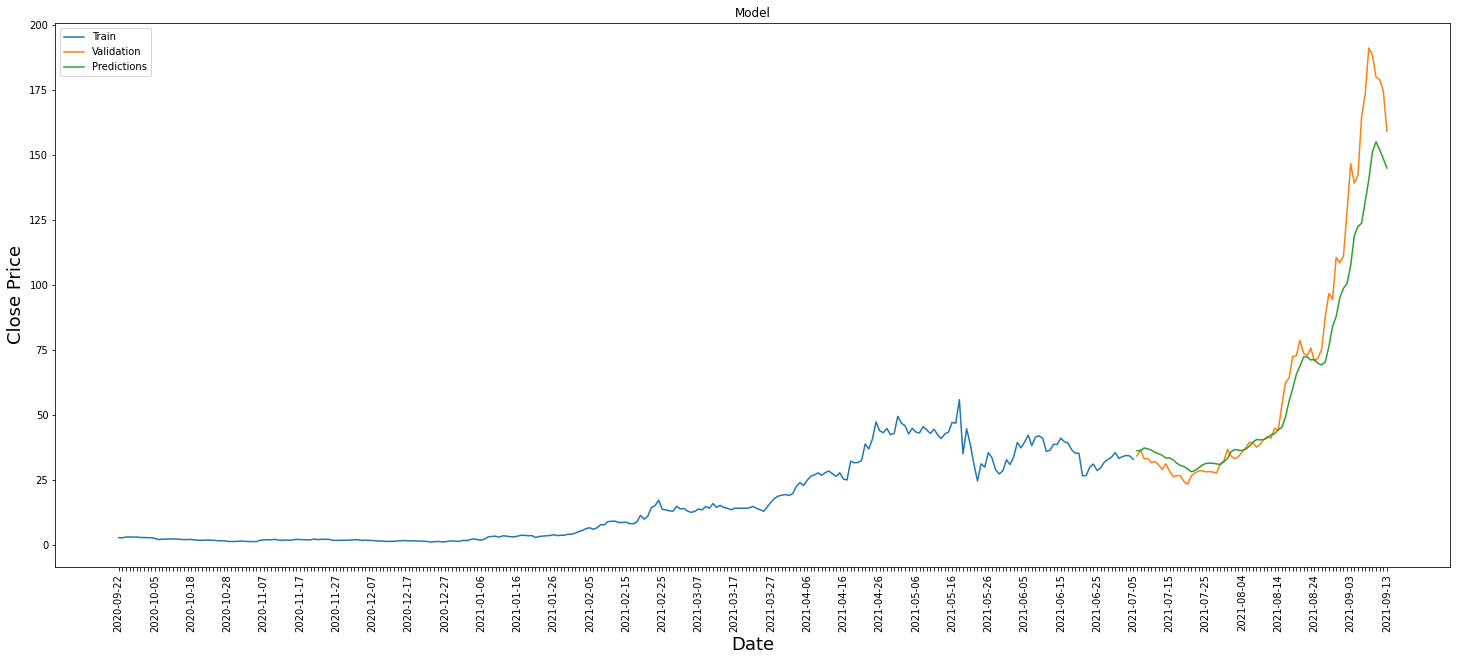

In [266]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#Tether Prediction Model

In [267]:
dataset1=tether[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

#Training Data

In [268]:
length=int(np.ceil(len(data)*0.8))
length

1752

In [269]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [270]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(100,len(train_data)):
    X_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [271]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#LSTM Model

In [272]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [273]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1652/1652 [==============================] - 93s 55ms/step - loss: 0.0028
Epoch 2/5
1652/1652 [==============================] - 88s 54ms/step - loss: 0.0019
Epoch 3/5
1652/1652 [==============================] - 89s 54ms/step - loss: 0.0017
Epoch 4/5
1652/1652 [==============================] - 91s 55ms/step - loss: 0.0015
Epoch 5/5
1652/1652 [==============================] - 90s 55ms/step - loss: 0.0016


#Test Dataset

In [274]:
test_data=scaled_data[length-100:,:]

X_test=[]
y_test=data[length:,:]

for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [275]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.002400385778851664

In [276]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
1752,2020-07-01,1.001561,0.998862
1753,2020-07-02,1.015718,0.999325
1754,2020-07-03,0.999521,1.004387
1755,2020-07-04,1.001078,0.999791
1756,2020-07-05,0.998899,0.999529
...,...,...,...
2184,2021-09-09,1.000146,0.998732
2185,2021-09-10,1.000320,0.998689
2186,2021-09-11,1.000979,0.998744
2187,2021-09-12,0.999698,0.998999


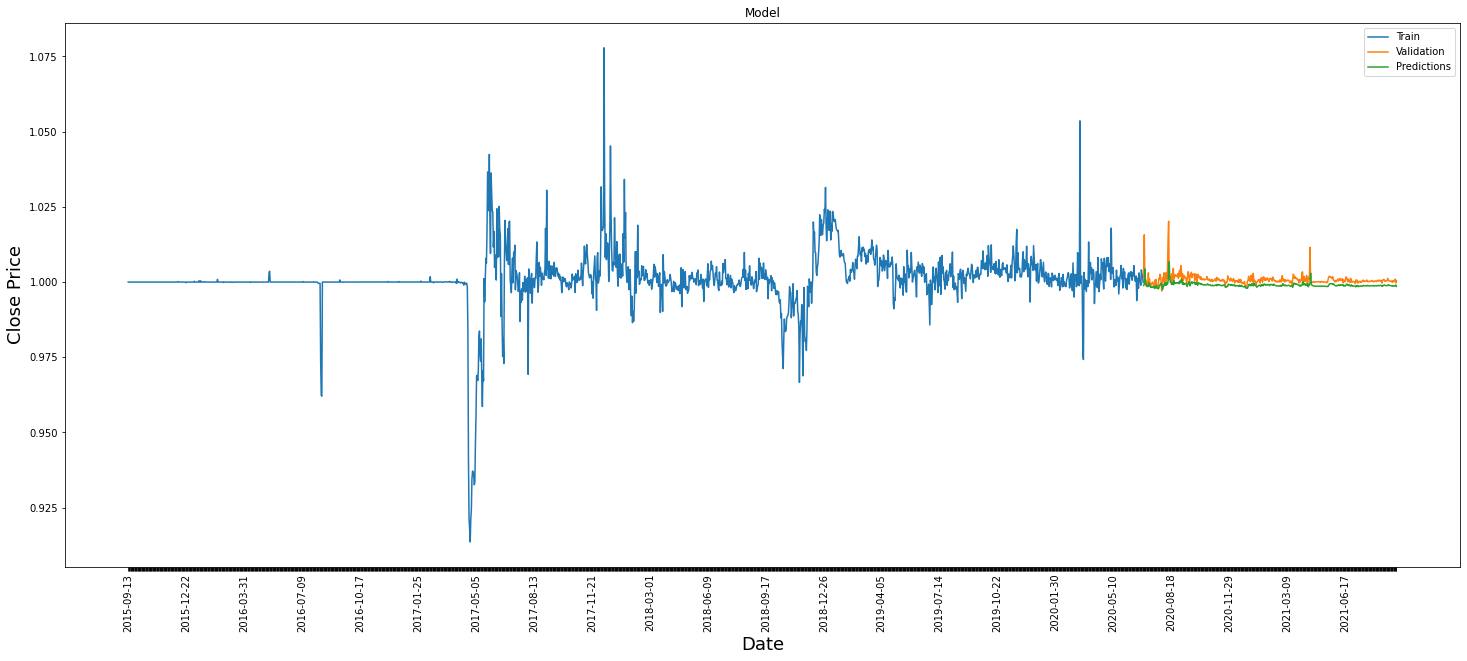

In [277]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#USD Coin Prediction Model

In [278]:
dataset1=usd_coin[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

#Training Data

In [279]:
length=int(np.ceil(len(data)*0.8))
length

536

In [280]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [281]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(100,len(train_data)):
    X_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [282]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#LSTM Model

In [283]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [284]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
436/436 [==============================] - 27s 54ms/step - loss: 0.0082
Epoch 2/5
436/436 [==============================] - 24s 55ms/step - loss: 0.0061
Epoch 3/5
436/436 [==============================] - 23s 54ms/step - loss: 0.0048
Epoch 4/5
436/436 [==============================] - 23s 53ms/step - loss: 0.0049
Epoch 5/5
436/436 [==============================] - 23s 53ms/step - loss: 0.0047


#Test Dataset

In [285]:
test_data=scaled_data[length-100:,:]

X_test=[]
y_test=data[length:,:]

for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [286]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.001116469734375442

In [287]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
536,2021-05-03,1.000104,1.001118
537,2021-05-04,1.000195,1.001132
538,2021-05-05,1.000118,1.001171
539,2021-05-06,1.000055,1.001188
540,2021-05-07,1.000077,1.001181
...,...,...,...
665,2021-09-09,1.000210,1.001107
666,2021-09-10,1.000231,1.001191
667,2021-09-11,1.000971,1.001244
668,2021-09-12,0.999490,1.001438


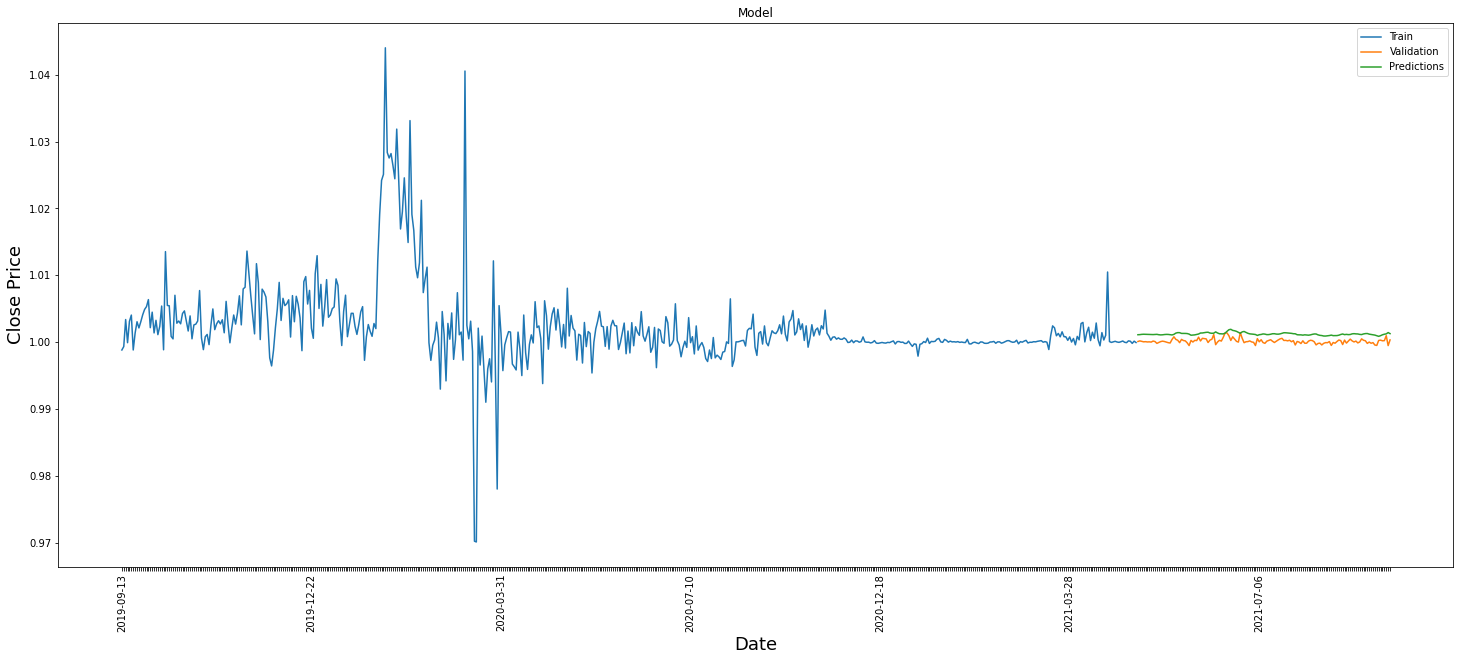

In [288]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()

#XRP Prediction Model

In [289]:
dataset1=xrp[['Date','Close']]
dataset=dataset1.set_index('Date')
data=dataset.values

#Training Data

In [290]:
length=int(np.ceil(len(data)*0.8))
length

1752

In [291]:
#Scaling data
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(data)

In [292]:
#Creating training data set
train_data=scaled_data[0:length ,:]
X_train=[]
y_train=[]

for i in range(100,len(train_data)):
    X_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])

In [293]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#LSTM Model

In [294]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [295]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1652/1652 [==============================] - 92s 54ms/step - loss: 0.0014
Epoch 2/5
1652/1652 [==============================] - 90s 54ms/step - loss: 8.1758e-04
Epoch 3/5
1652/1652 [==============================] - 89s 54ms/step - loss: 0.0016
Epoch 4/5
1652/1652 [==============================] - 88s 54ms/step - loss: 5.1098e-04
Epoch 5/5
1652/1652 [==============================] - 89s 54ms/step - loss: 4.2741e-04


#Test Dataset

In [296]:
test_data=scaled_data[length-100:,:]

X_test=[]
y_test=data[length:,:]

for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [297]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.1924775331710515

In [298]:
train=dataset1[:length]
valid=dataset1[length:]
valid['Predictions']=predictions
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Close,Predictions
1752,2020-07-01,0.176976,0.210496
1753,2020-07-02,0.177244,0.210994
1754,2020-07-03,0.176336,0.211504
1755,2020-07-04,0.177984,0.211168
1756,2020-07-05,0.177017,0.211780
...,...,...,...
2184,2021-09-09,1.089401,0.761629
2185,2021-09-10,1.057267,0.748228
2186,2021-09-11,1.079906,0.749181
2187,2021-09-12,1.119636,0.779642


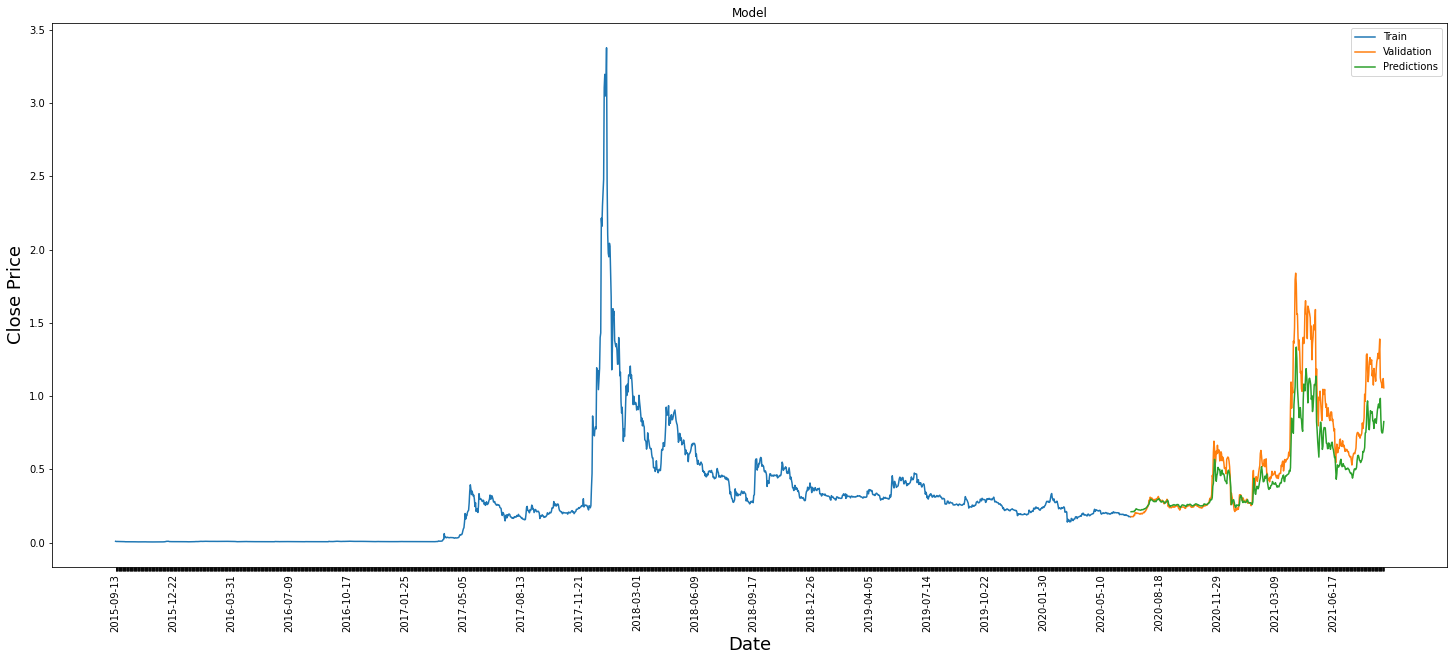

In [299]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Model')

plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])
every_nth = 100
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=90)
plt.show()